Clustering analysis

In [32]:
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/Combined_data_new.csv'
df=pd.read_csv(url,index_col='FIPS',encoding="ISO-8859-1")

In [98]:
#standardize data: (x-mean(x))/std
from sklearn import preprocessing
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 1001 to 56045
Data columns (total 65 columns):
State                                3143 non-null object
County                               3143 non-null object
PCT_LACCESS_POP15                    3102 non-null float64
PCT_LACCESS_LOWI15                   3123 non-null float64
PCT_LACCESS_HHNV15                   3140 non-null float64
PCT_LACCESS_SNAP15                   3123 non-null float64
PCT_LACCESS_CHILD15                  3124 non-null float64
PCT_LACCESS_SENIORS15                3124 non-null float64
PCT_LACCESS_WHITE15                  3124 non-null float64
PCT_LACCESS_BLACK15                  3124 non-null float64
PCT_LACCESS_HISP15                   3124 non-null float64
PCT_LACCESS_NHASIAN15                3124 non-null float64
PCT_LACCESS_NHNA15                   3124 non-null float64
PCT_LACCESS_NHPI15                   3124 non-null float64
PCT_LACCESS_MULTIR15                 3124 non-null float64
GROCPT

In [317]:
#read in variable information and build variable information dictionary with variable names as key
url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/Food_atlas/variable_info.csv'
var_info_df=pd.read_csv(url,encoding="ISO-8859-1", index_col='Variable Code')

In [324]:
var_info_df.loc['LACCESS_POP10']['Category Name']+'_'+var_info_df.loc['LACCESS_POP10']['Units']

'Access and Proximity to Grocery Store_Count'

In [226]:
df_no_region=df[df.columns.difference(['Region', 'Division','State', 'County', 'RUCC_2013', 'Adult_db', 'Adult_ob'])]

In [227]:
df_dropnacol=df_no_region.dropna(axis=1)

In [228]:
df_dropnacol.shape

(3143, 35)

build pipeline for hierachical clustering: scaler to clustering

In [236]:
normed_data=preprocessing.scale(df_dropnacol)
normed_df=pd.DataFrame(normed_data, index=df_dropnacol.index, columns=df_dropnacol.columns)

PCA

explained variance exceeds 95% at variable 'Convenience', where we keep that variables from top until 'Convenience', so the dimentions decrease from 24 to 19

In [237]:
#PCA using Sklearn 
from sklearn.decomposition import PCA

explained_var=list()
for d in range(1,len(normed_df.columns)):
    pca = PCA(n_components=d)
    pca.fit(normed_df)
    explained_var.append(sum(pca.explained_variance_ratio_))

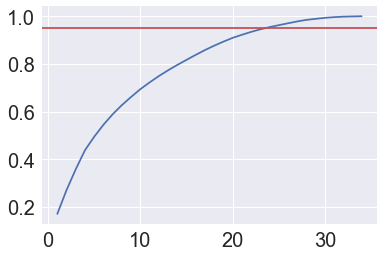

In [239]:
plt.plot(range(1,len(normed_df.columns)), explained_var)
plt.axhline(y=0.95, color='r')
plt.show()

In [240]:
#95% of variance can be explained by 24 components out of total 35 variables
pca = PCA(n_components=24)
pca.fit(normed_df)

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [241]:
data_transformed=pca.transform(normed_df)
df_transformed=pd.DataFrame(data_transformed, index=normed_df.index)

Hierachical clustering

In [242]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

X=df_transformed
distance_way= ['ward', 'single', 'average', 'weighted', 'centroid', 'median']

for m in distance_way:
    Z = linkage(X, m)
    c, coph_dists = cophenet(Z, pdist(X))
    print (m, c)

ward 0.294739560013
single 0.775952729107
average 0.859292288577
weighted 0.710224670932
centroid 0.845687581147
median 0.680491383043


both average method and centroid method is the best regarding the similarity between compuated distance to real distance

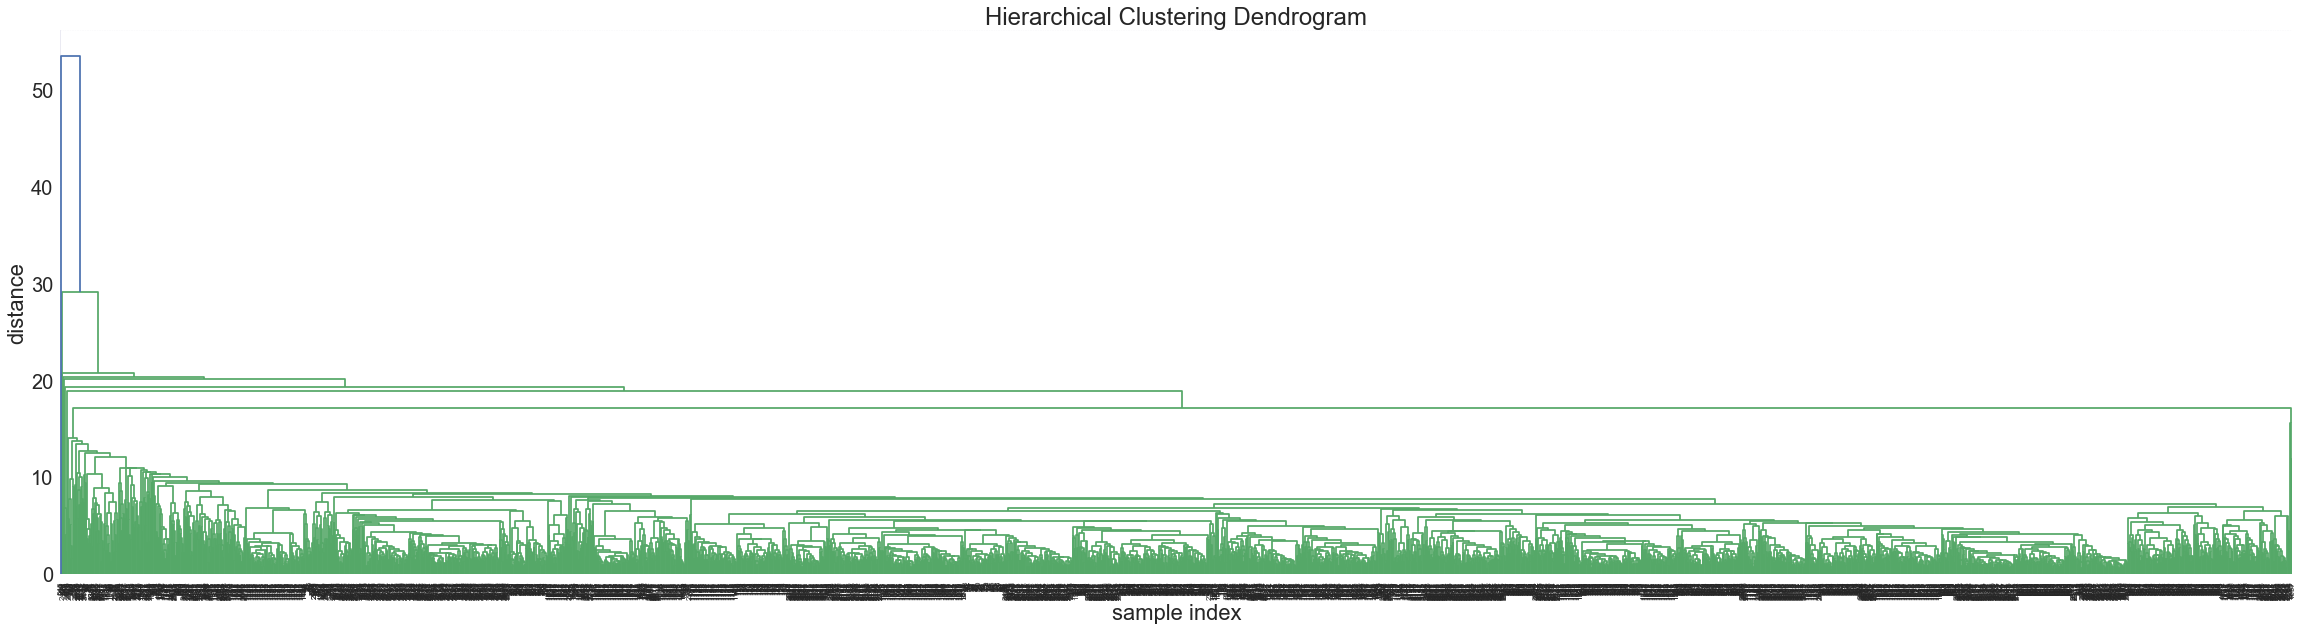

In [244]:
Z = linkage(X, 'average')
plt.figure(figsize=(40, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.show()

cut into several clusters to better understand each cluster

In [245]:
from scipy.cluster.hierarchy import cut_tree, fcluster
from collections import Counter

for distance in range(20):
    labels = fcluster(Z,distance,'distance')
    print (distance, max(Counter(labels).values()), max(labels))

0 1 3143
1 7 2877
2 60 1470
3 87 724
4 171 405
5 453 247
6 833 146
7 2022 93
8 2422 56
9 2878 43
10 3008 31
11 3057 17
12 3057 16
13 3116 13
14 3127 11
15 3129 10
16 3129 9
17 3129 9
18 3133 8
19 3134 7


In [246]:
labels = fcluster(Z,6,'distance')
Counter(labels)

Counter({1: 3,
         2: 1,
         3: 2,
         4: 4,
         5: 1,
         6: 2,
         7: 1,
         8: 1,
         9: 1,
         10: 1,
         11: 2,
         12: 1,
         13: 1,
         14: 1,
         15: 1,
         16: 1,
         17: 1,
         18: 1,
         19: 1,
         20: 1,
         21: 1,
         22: 1,
         23: 7,
         24: 3,
         25: 1,
         26: 1,
         27: 5,
         28: 6,
         29: 1,
         30: 1,
         31: 3,
         32: 6,
         33: 5,
         34: 4,
         35: 3,
         36: 3,
         37: 2,
         38: 1,
         39: 1,
         40: 1,
         41: 2,
         42: 1,
         43: 1,
         44: 3,
         45: 1,
         46: 2,
         47: 2,
         48: 1,
         49: 2,
         50: 2,
         51: 5,
         52: 2,
         53: 1,
         54: 1,
         55: 3,
         56: 1,
         57: 1,
         58: 1,
         59: 1,
         60: 1,
         61: 2,
         62: 1,
         63: 1,
 

In [249]:
groups_to_plot=[l for l in Counter(labels).keys() if Counter(labels)[l]>100]

In [250]:
groups_to_plot

[121, 123, 120, 100, 128, 129]

In [251]:
sum([v for v in Counter(labels).values() if v>=100])

2193

In [252]:
df['group']=labels

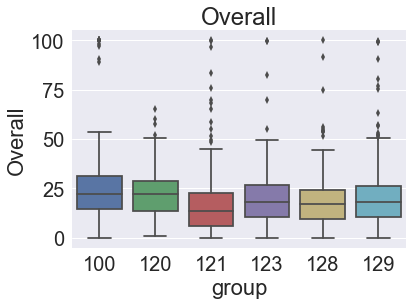

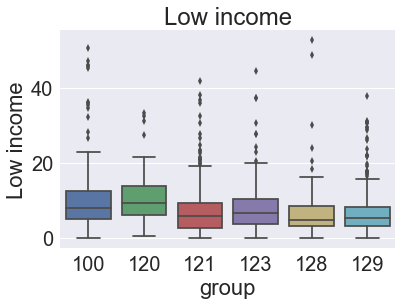

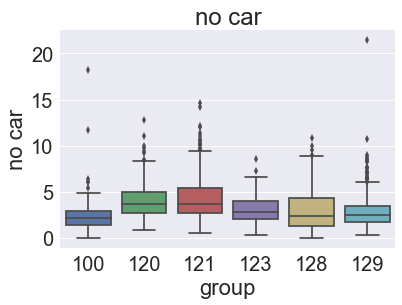

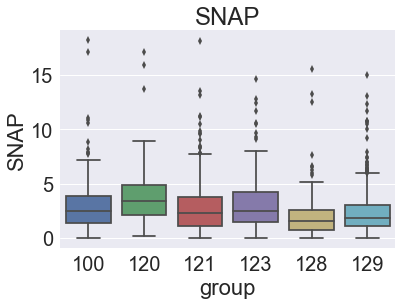

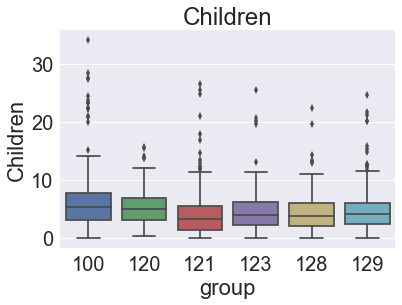

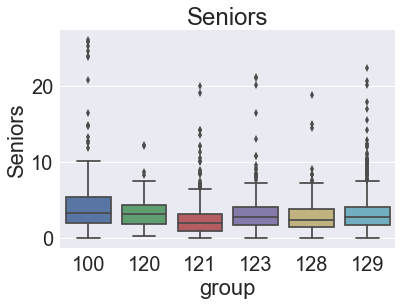

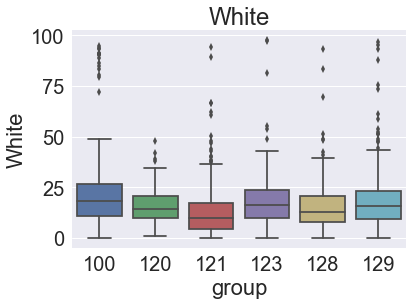

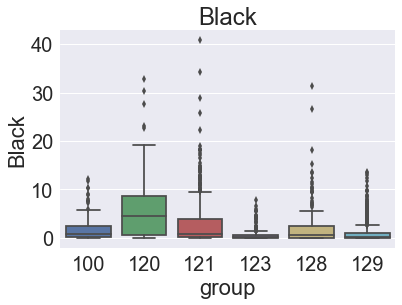

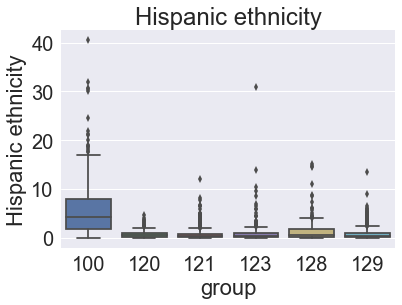

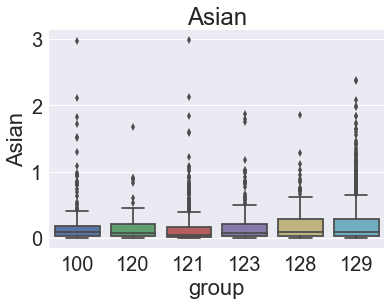

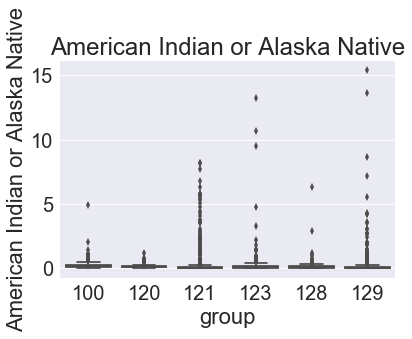

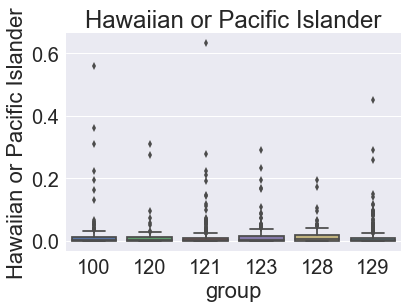

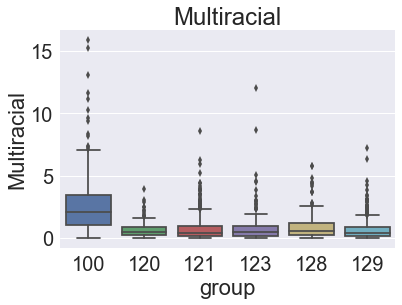

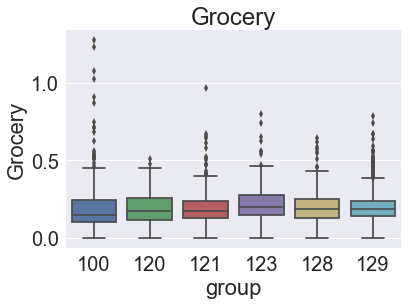

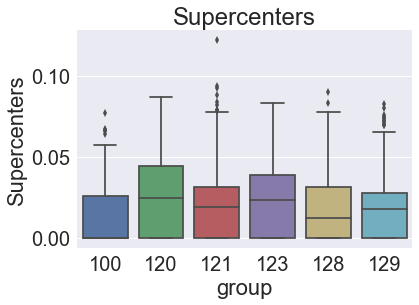

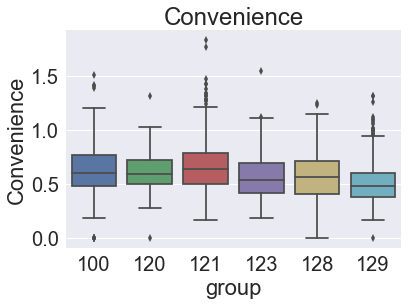

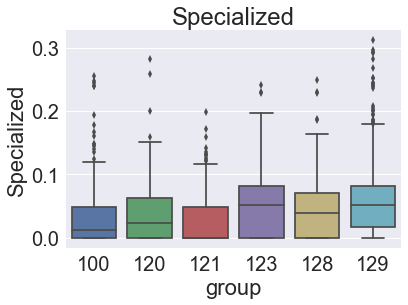

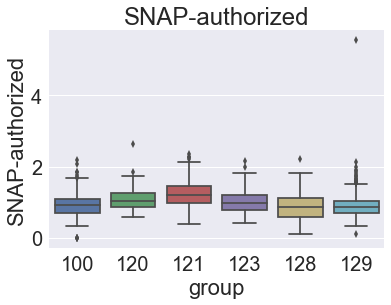

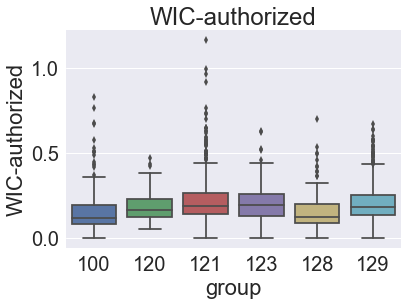

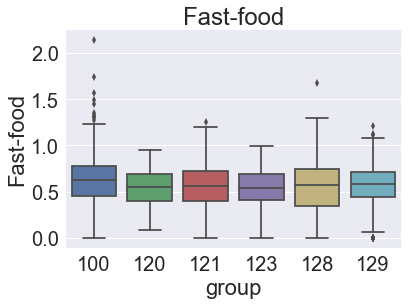

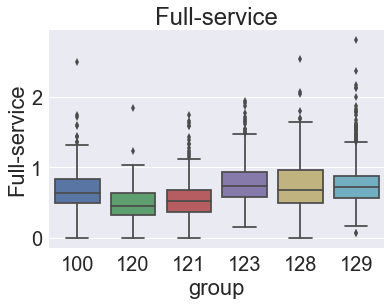

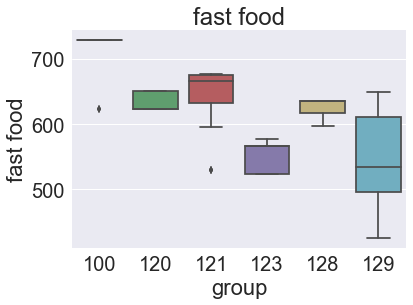

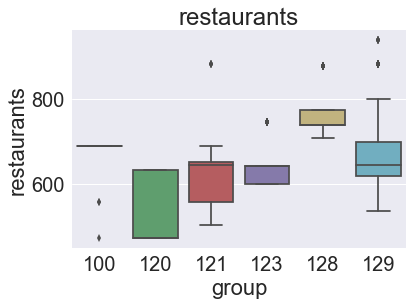

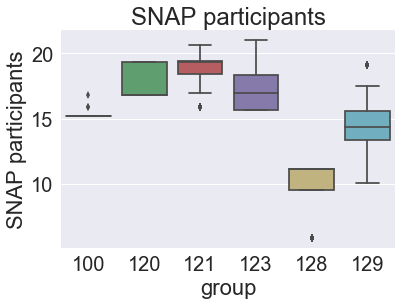

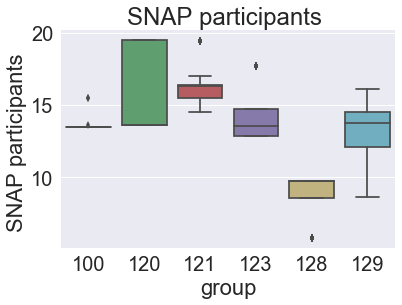

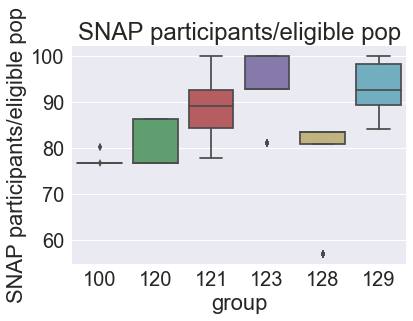

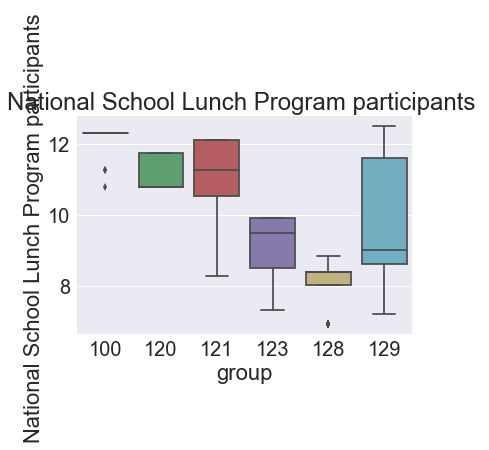

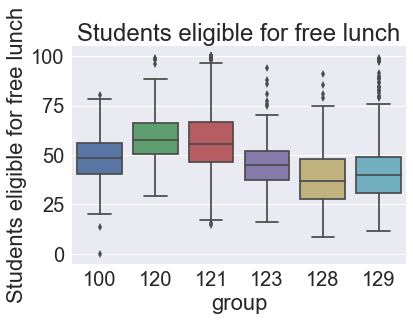

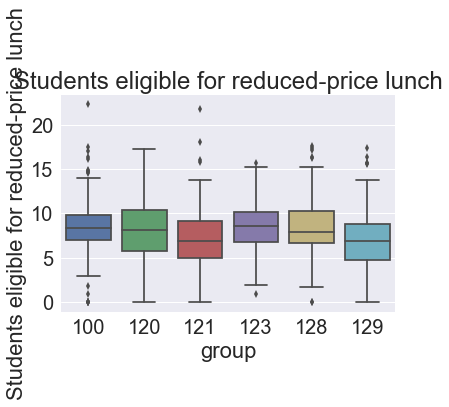

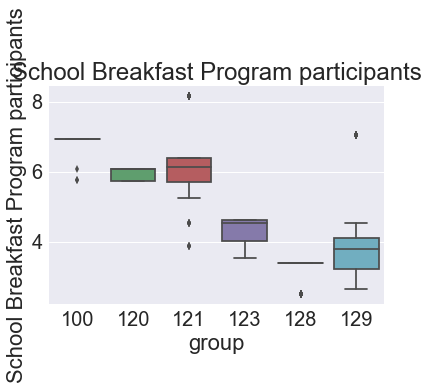

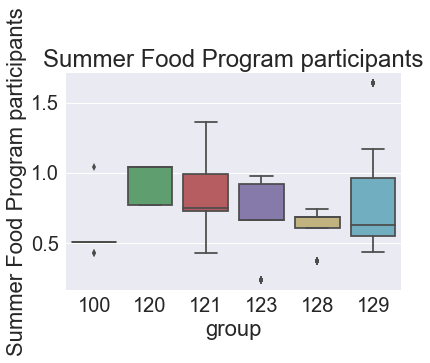

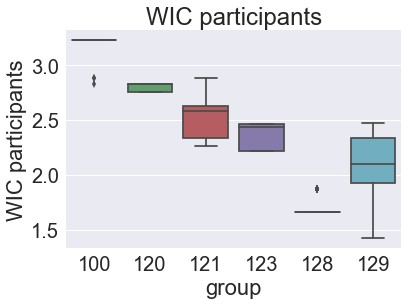

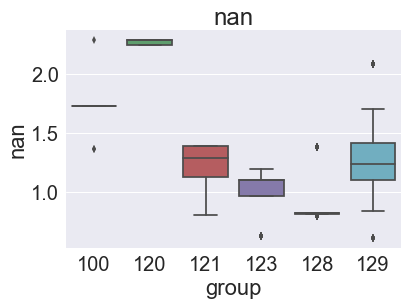

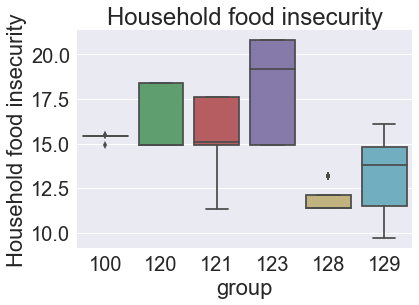

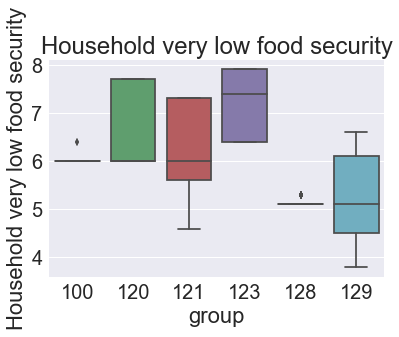

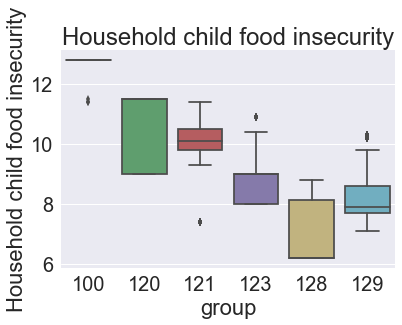

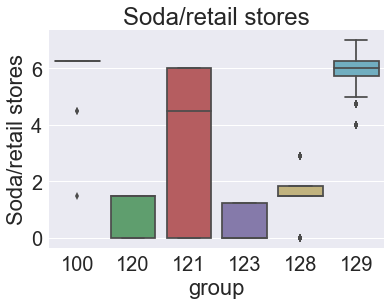

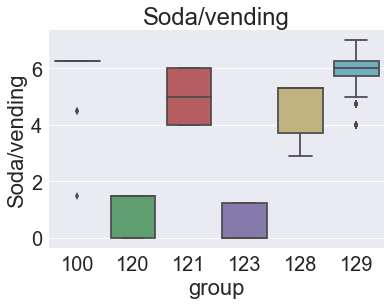

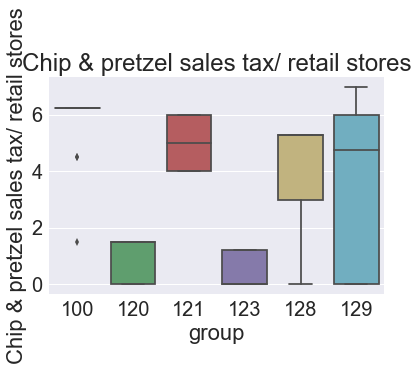

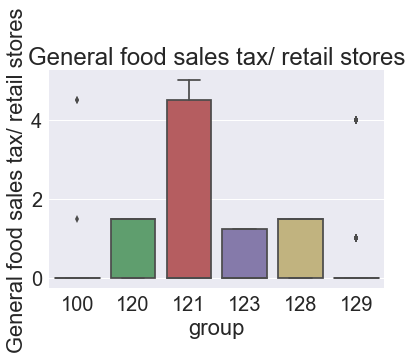

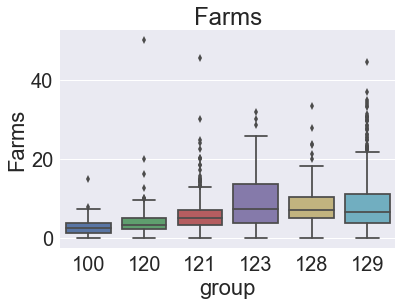

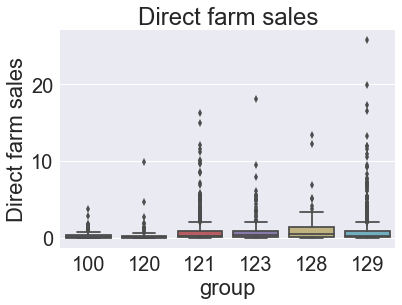

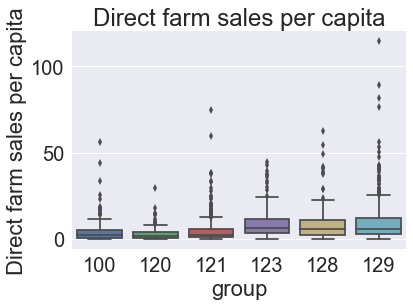

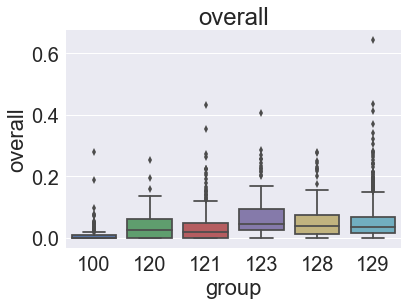

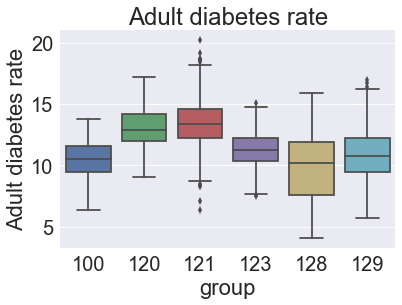

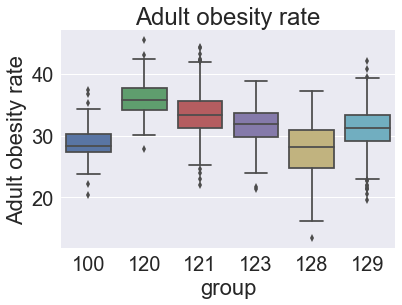

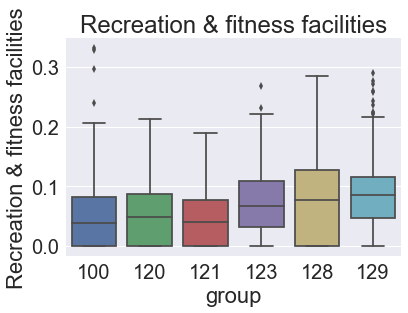

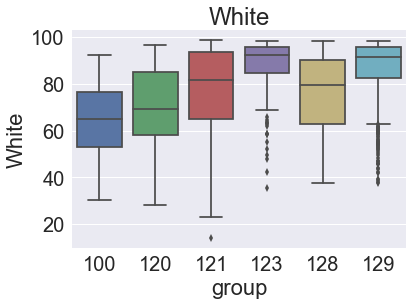

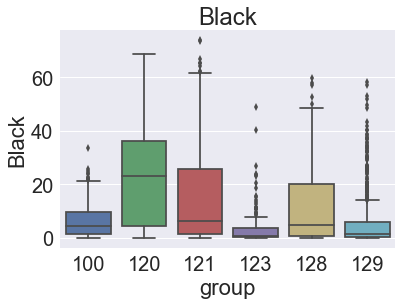

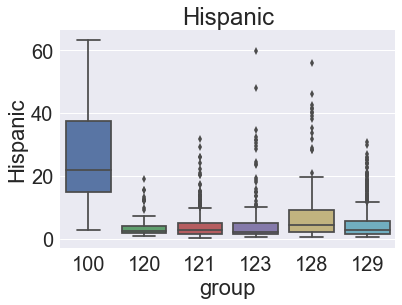

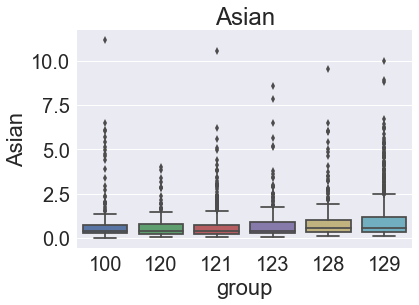

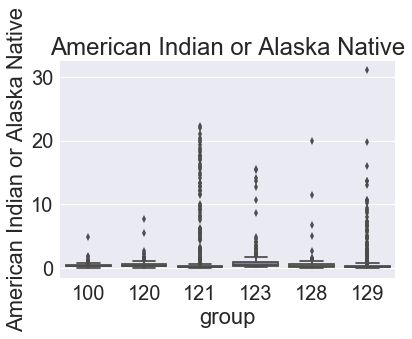

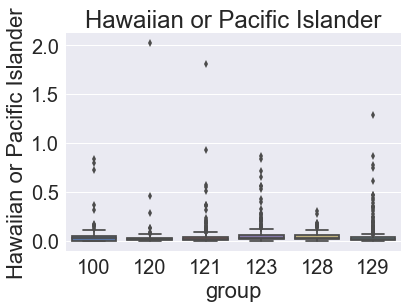

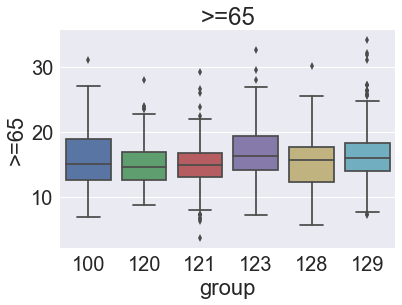

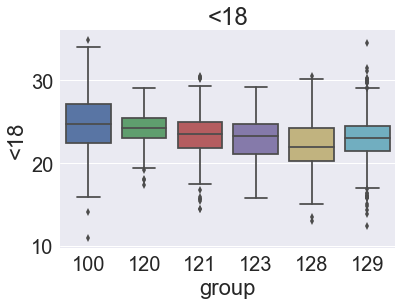

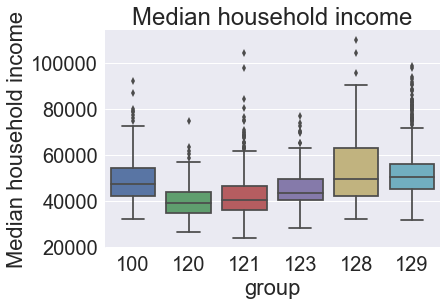

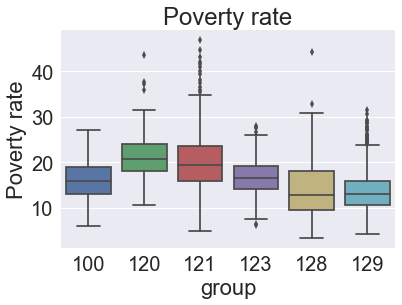

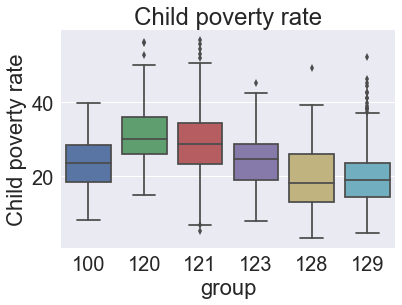

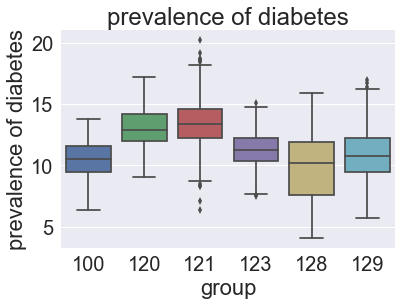

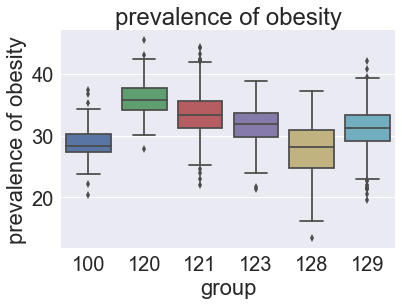

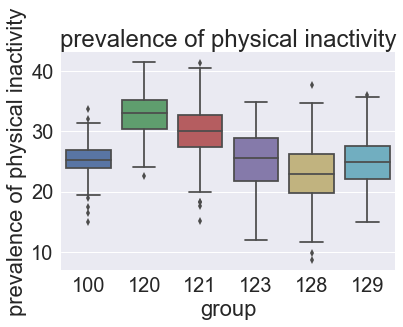

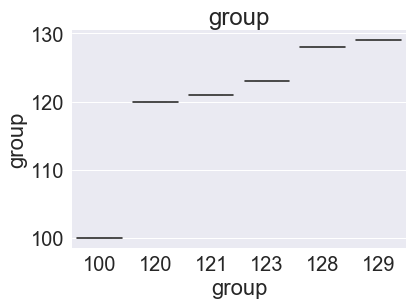

In [253]:
#colors=['b','g','y','r', 'orange','m', 'purple']

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

for c in df.columns:
    if is_numeric_dtype(df[c]):
        plt.figure()
        sns.boxplot(x='group', y=c, data=df[df['group'].isin(groups_to_plot)])
        if c in var_info_dict['Sub_subcategory Name'].keys():
            plt.title(var_info_dict['Sub_subcategory Name'][c])
            plt.ylabel(var_info_dict['Sub_subcategory Name'][c])
            
        else:
            plt.title(c) 
            plt.ylabel(c)
        
        plt.legend()
        plt.show()

In [221]:
other_groups_to_plot=[l for l in Counter(labels).keys() if (Counter(labels)[l]<20) & (Counter(labels)[l]>1)]

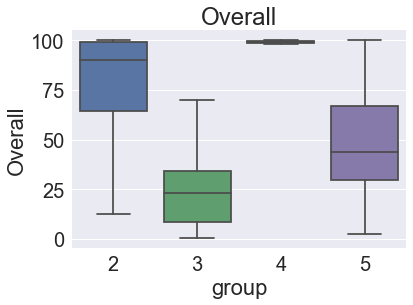

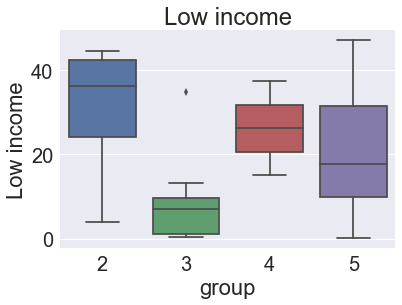

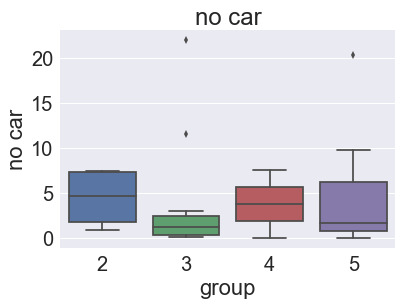

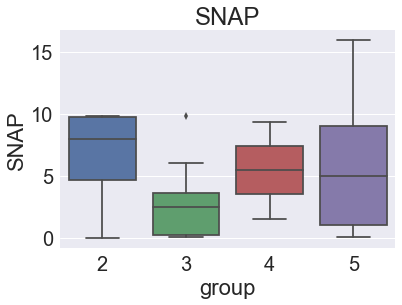

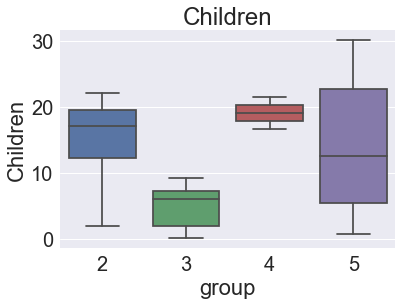

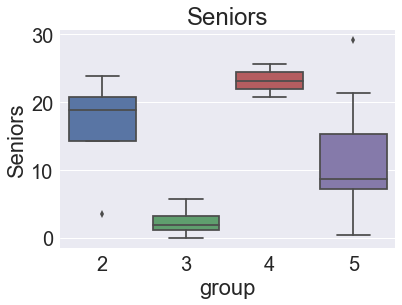

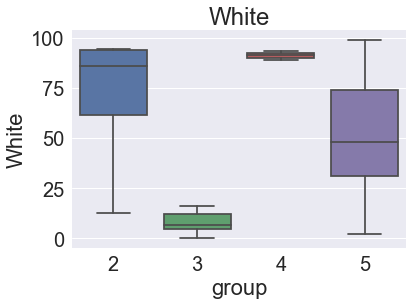

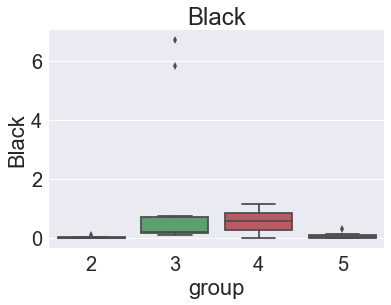

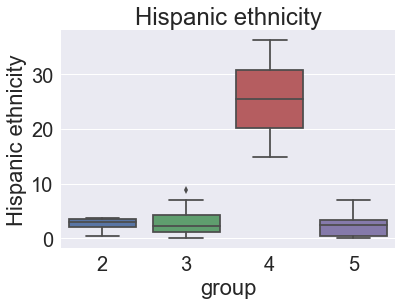

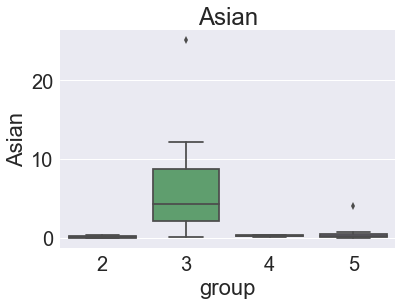

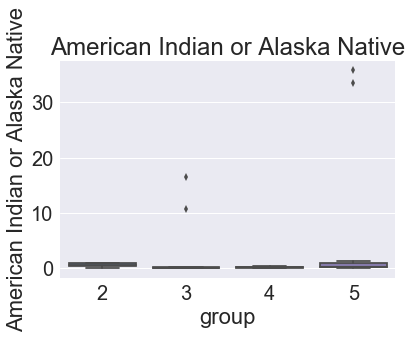

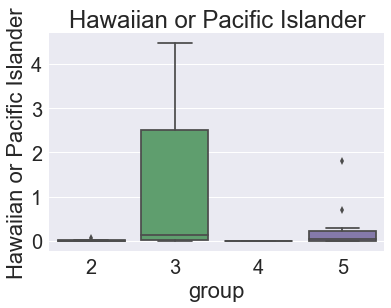

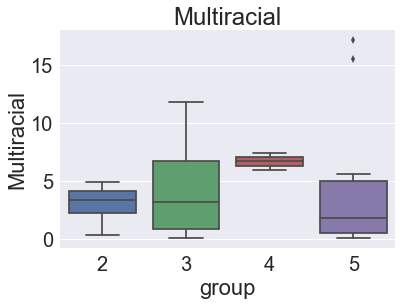

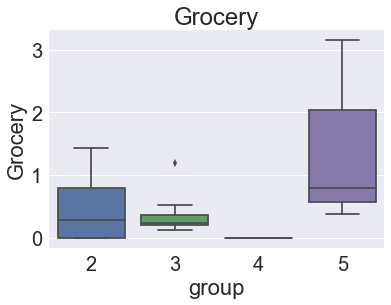

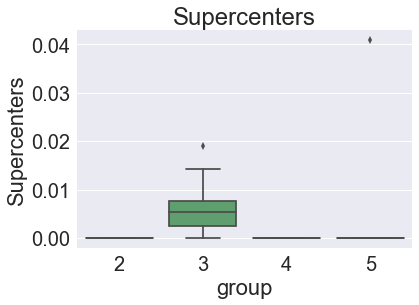

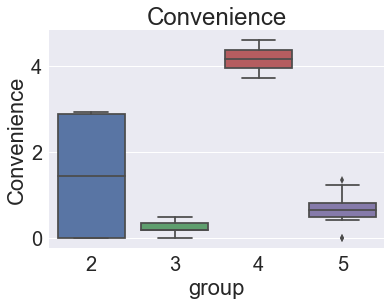

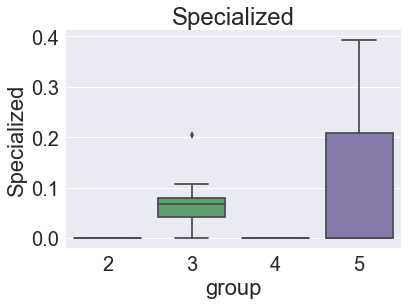

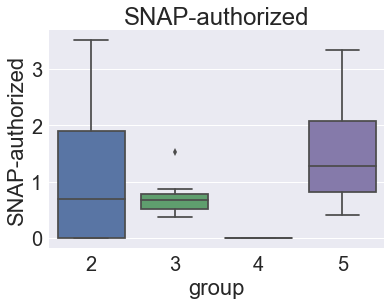

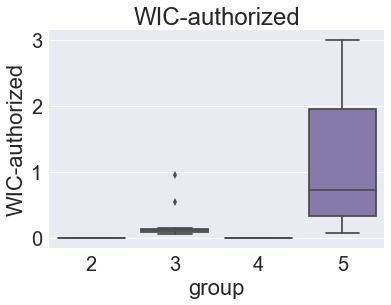

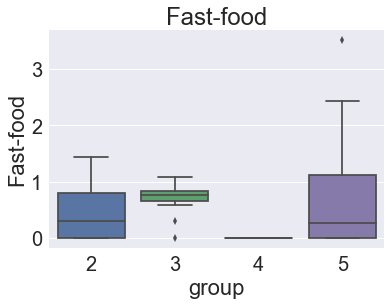

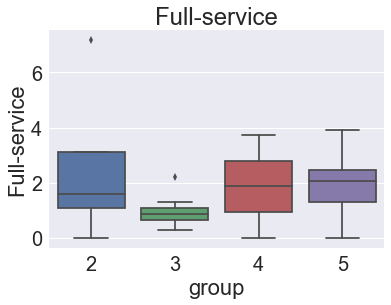

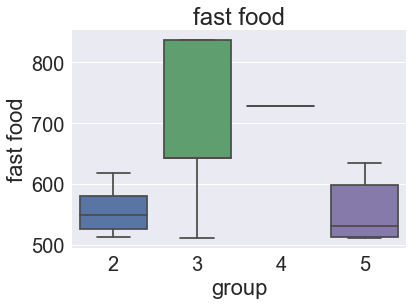

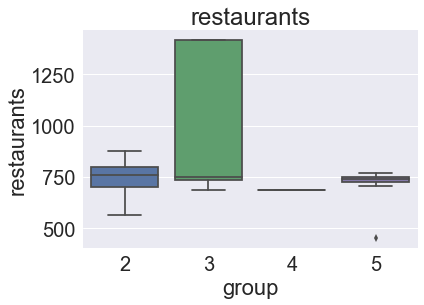

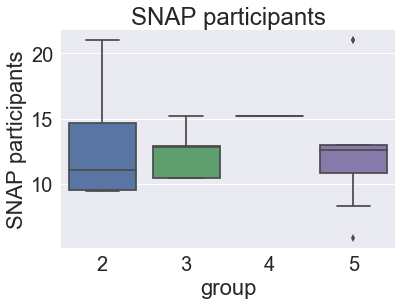

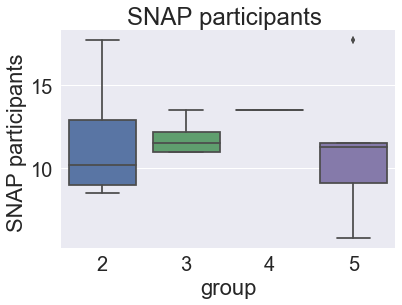

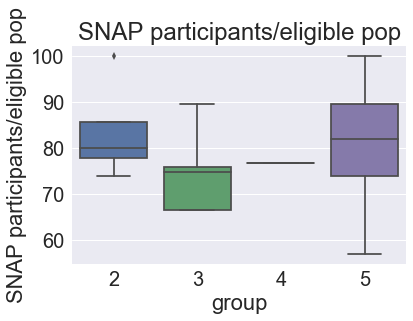

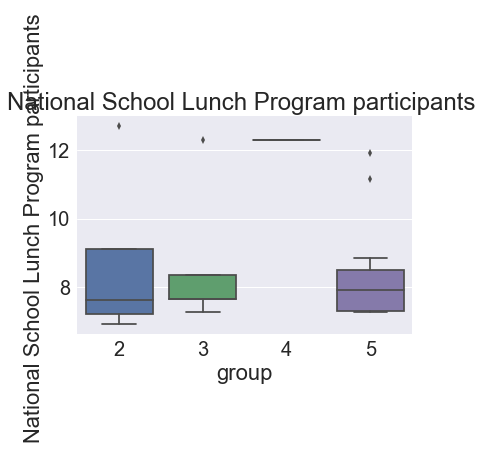

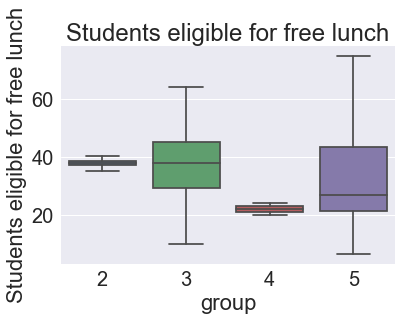

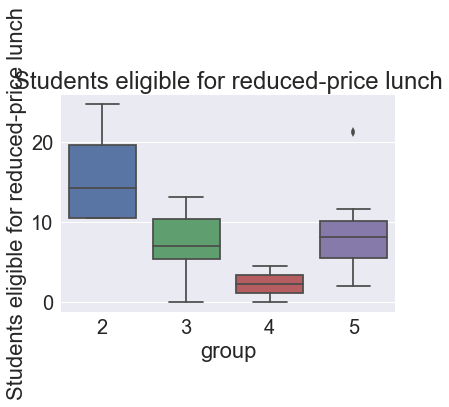

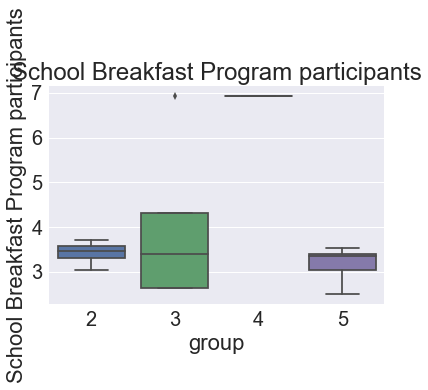

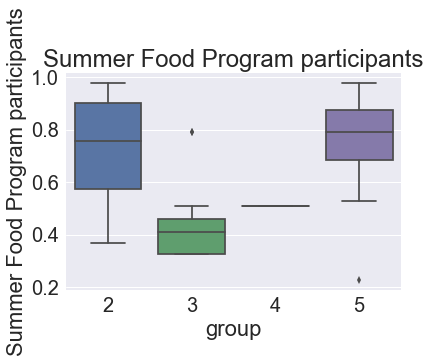

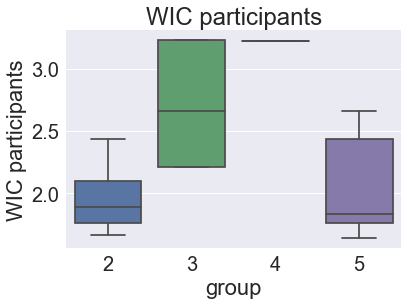

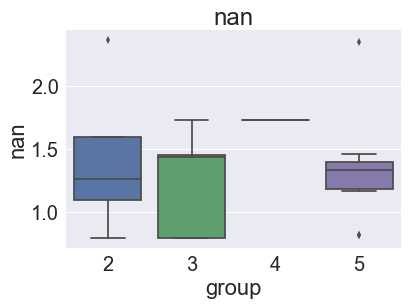

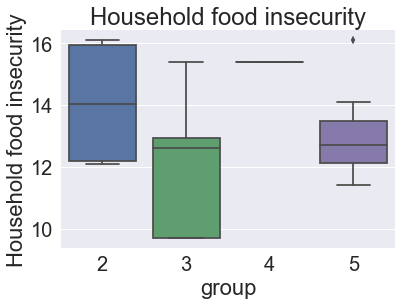

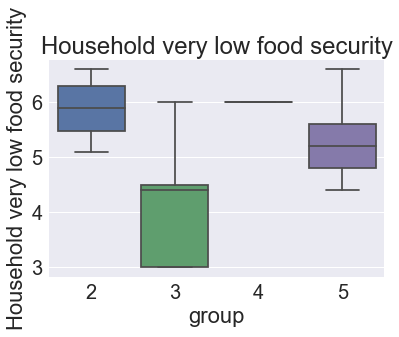

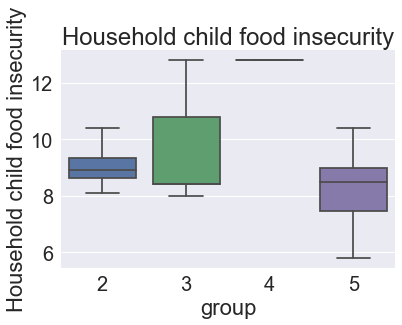

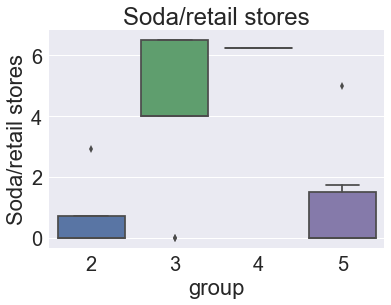

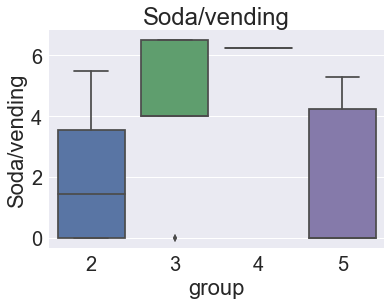

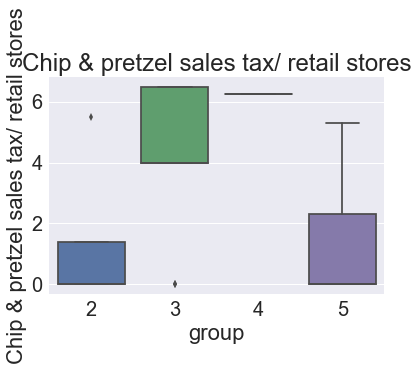

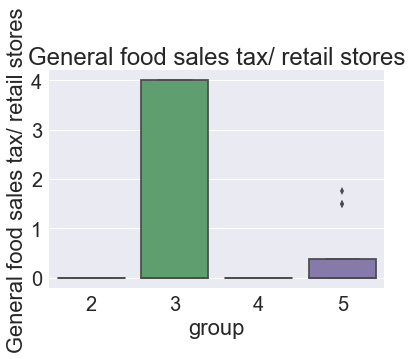

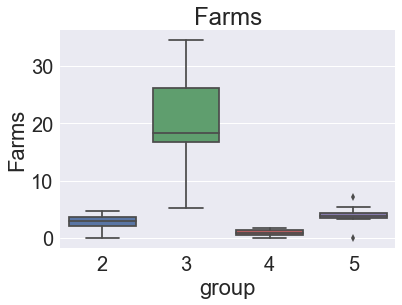

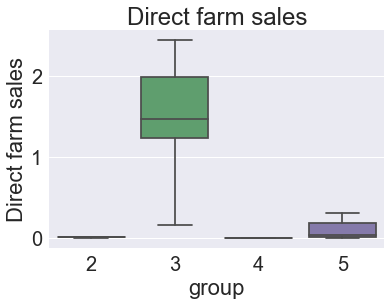

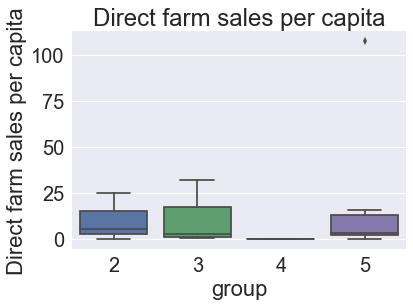

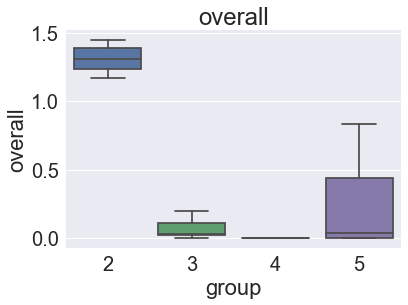

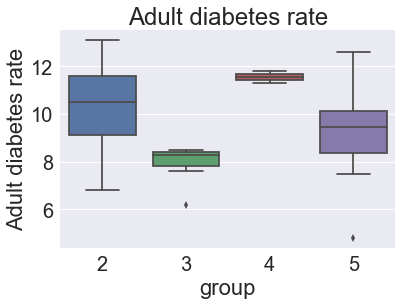

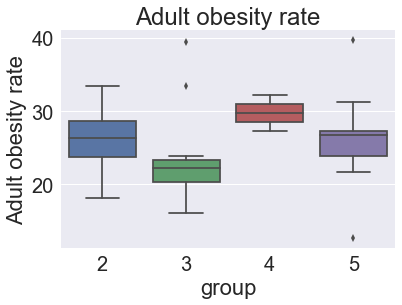

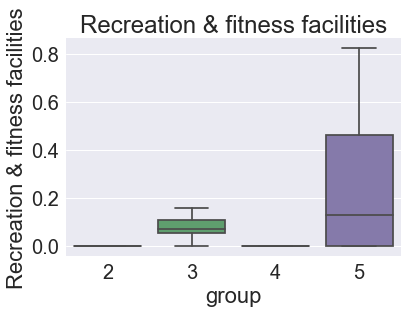

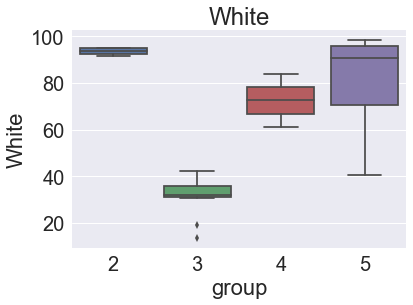

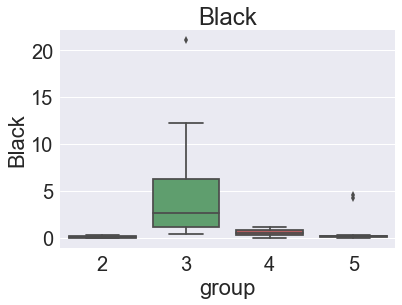

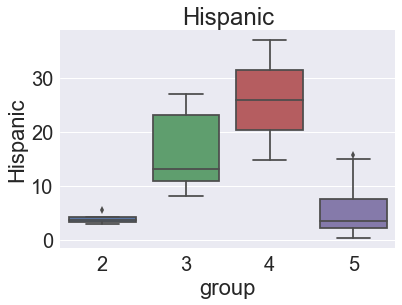

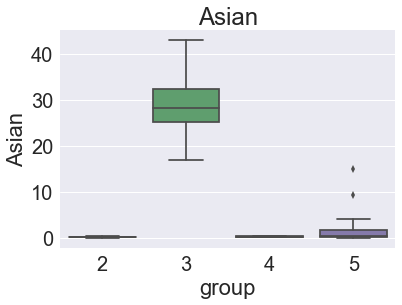

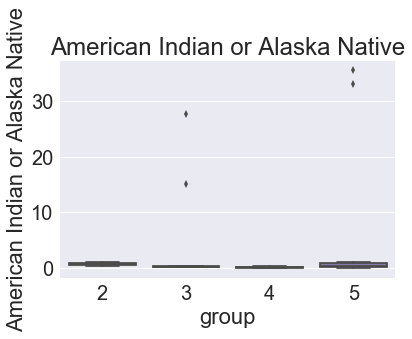

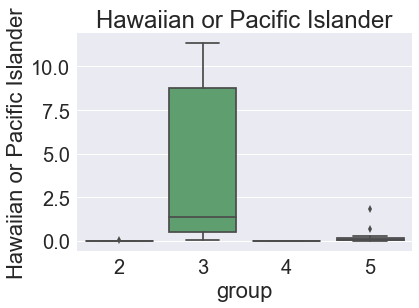

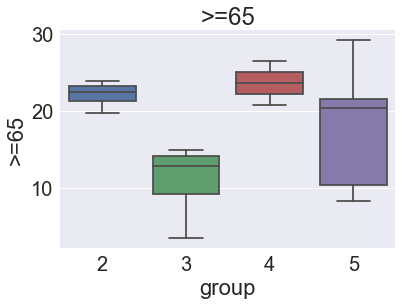

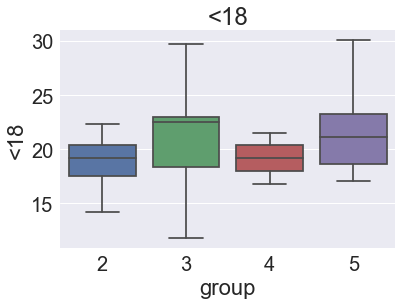

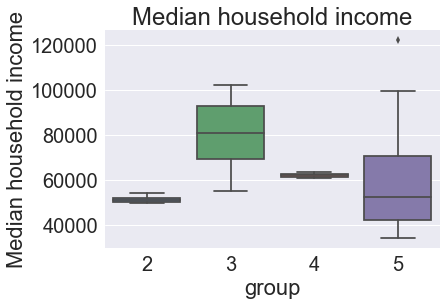

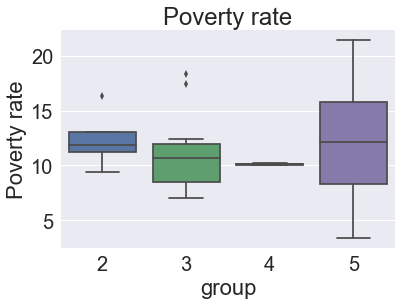

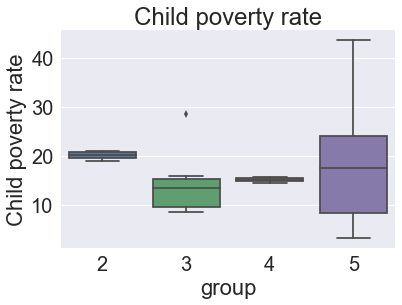

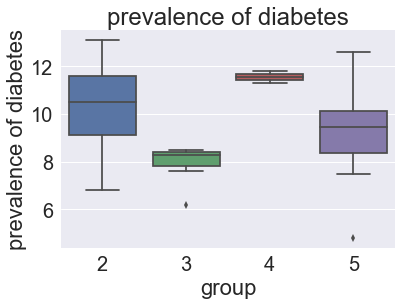

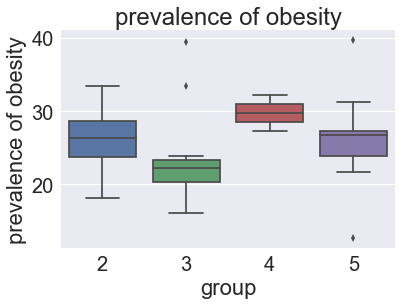

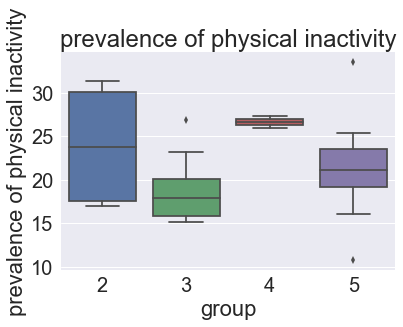

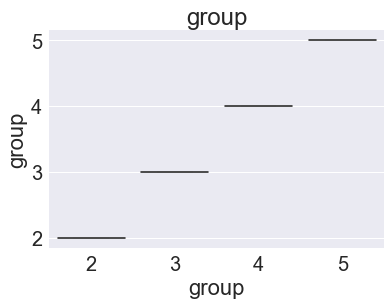

In [222]:
for c in df.columns:
    if is_numeric_dtype(df[c]):
        plt.figure()
        sns.boxplot(x='group', y=c, data=df[df['group'].isin(other_groups_to_plot)])
        if c in var_info_dict['Sub_subcategory Name'].keys():
            plt.title(var_info_dict['Sub_subcategory Name'][c])
            plt.ylabel(var_info_dict['Sub_subcategory Name'][c])
            
        else:
            plt.title(c) 
            plt.ylabel(c)
        
        plt.legend()
        plt.show()

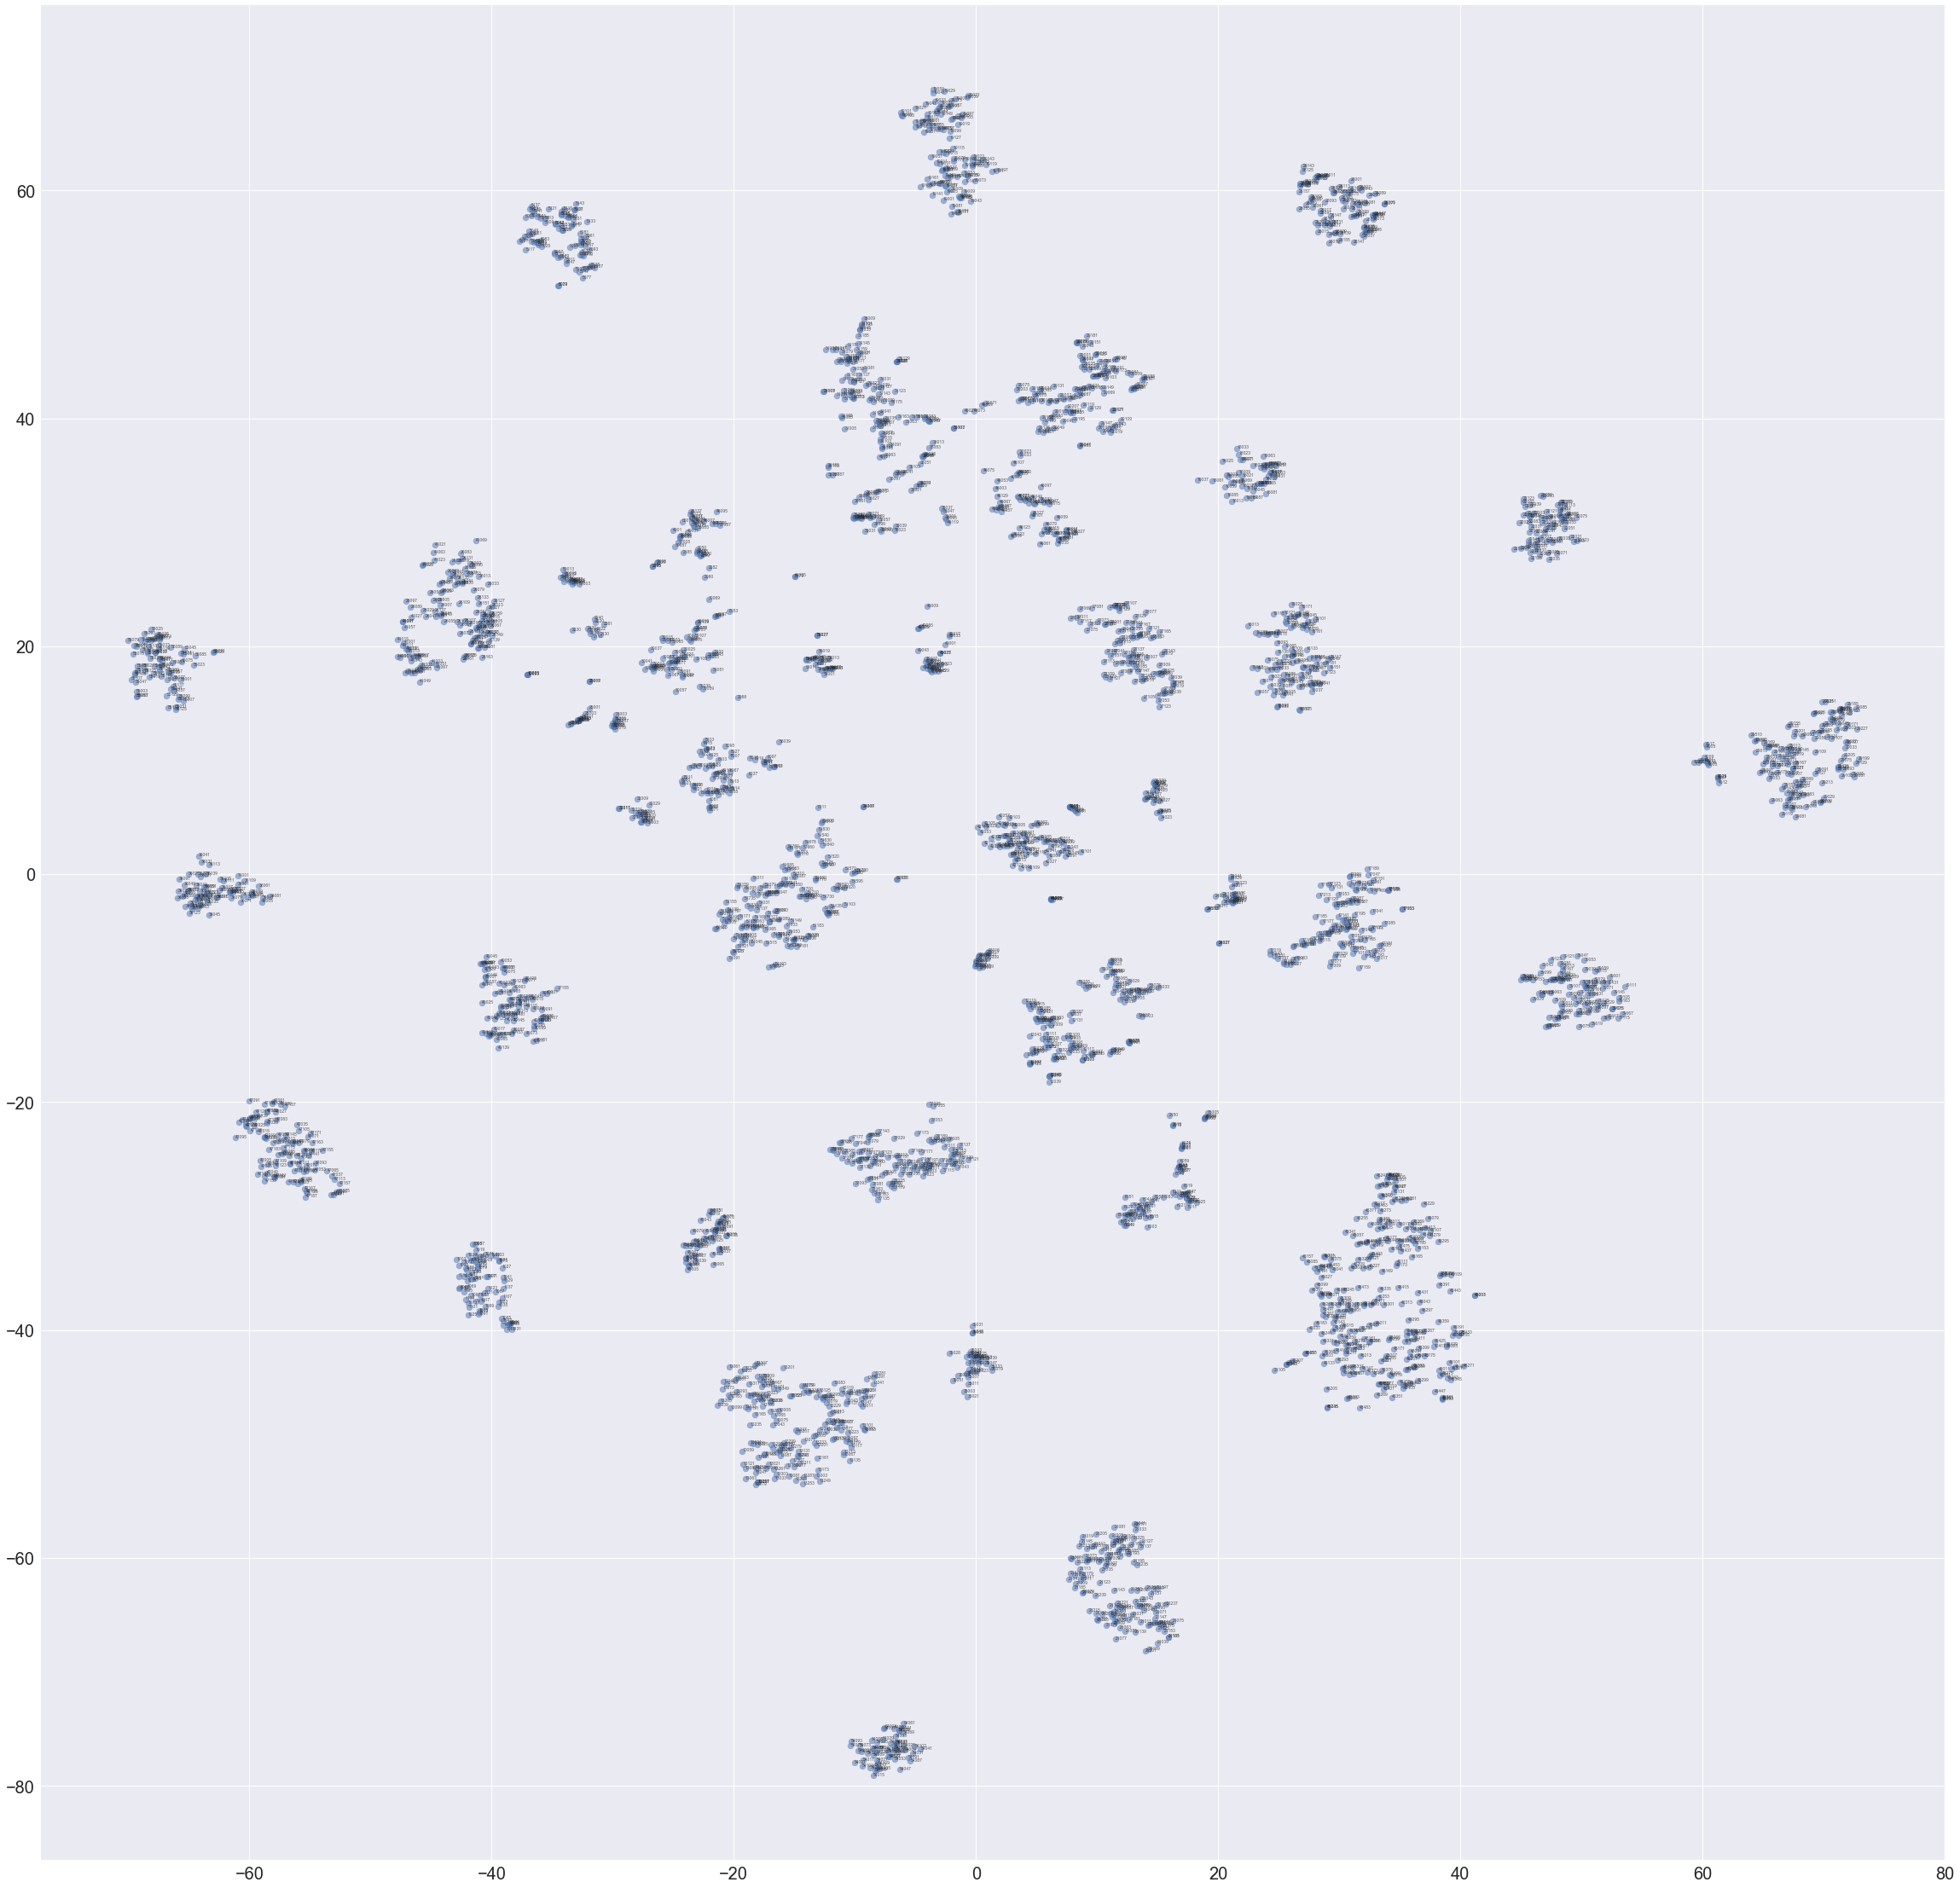

In [223]:
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(normed_df[normed_df.columns.difference(['group'])])

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.figure(figsize=(40,40))
plt.scatter(xs, ys, alpha=0.5)
# Scatter plot


# Annotate the points
for x, y, fips in zip(xs, ys, normed_df.index):
    plt.annotate(fips, (x, y), fontsize=5, alpha=0.75)
plt.show()


Hierachical clustering of the most diabetes prevalent counties

In [263]:
np.array(df['prevalence of diabetes'])

array([ 13. ,  10.4,  18.4, ...,   9. ,  12. ,  10. ])

In [296]:
top_prev_db=np.percentile(df['prevalence of diabetes'].dropna(), 80)

In [295]:
print (top_prev_db)

12.9


In [278]:
df_sub=df[df['prevalence of diabetes']>13.3]

In [279]:
df_sub_drop=df_sub[df_sub.columns.difference(['Region', 'Division','State', 'County', 'RUCC_2013', 'Adult_db', 'Adult_ob'])]

In [280]:
df_sub_drop=df_sub_drop.dropna(axis=1)

In [281]:
df_sub_drop.shape

(621, 42)

In [282]:
normed_data_sub=preprocessing.scale(df_sub_drop)
normed_df_sub=pd.DataFrame(normed_data_sub, index=df_sub_drop.index, columns=df_sub_drop.columns)

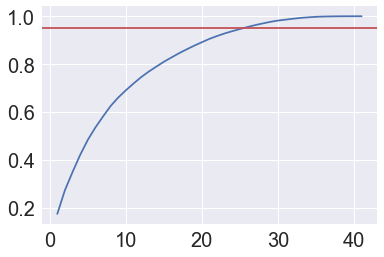

In [283]:
explained_var=list()
for d in range(1,len(normed_df_sub.columns)):
    pca = PCA(n_components=d)
    pca.fit(normed_df_sub)
    explained_var.append(sum(pca.explained_variance_ratio_))
    
plt.plot(range(1,len(normed_df_sub.columns)), explained_var)
plt.axhline(y=0.95, color='r')
plt.show()

In [284]:
#95% of variance can be explained by 25 components out of total 42 variables
pca = PCA(n_components=25)
pca.fit(normed_df_sub)
data_sub_transformed=pca.transform(normed_df_sub)
df_sub_transformed=pd.DataFrame(data_sub_transformed, index=normed_df_sub.index)

In [285]:
X=data_sub_transformed
distance_way= ['ward', 'single', 'average', 'weighted', 'centroid', 'median']

for m in distance_way:
    Z = linkage(X, m)
    c, coph_dists = cophenet(Z, pdist(X))
    print (m, c)

ward 0.479151165849
single 0.808784766887
average 0.860068986743
weighted 0.778882387109
centroid 0.848816734519
median 0.773669989874


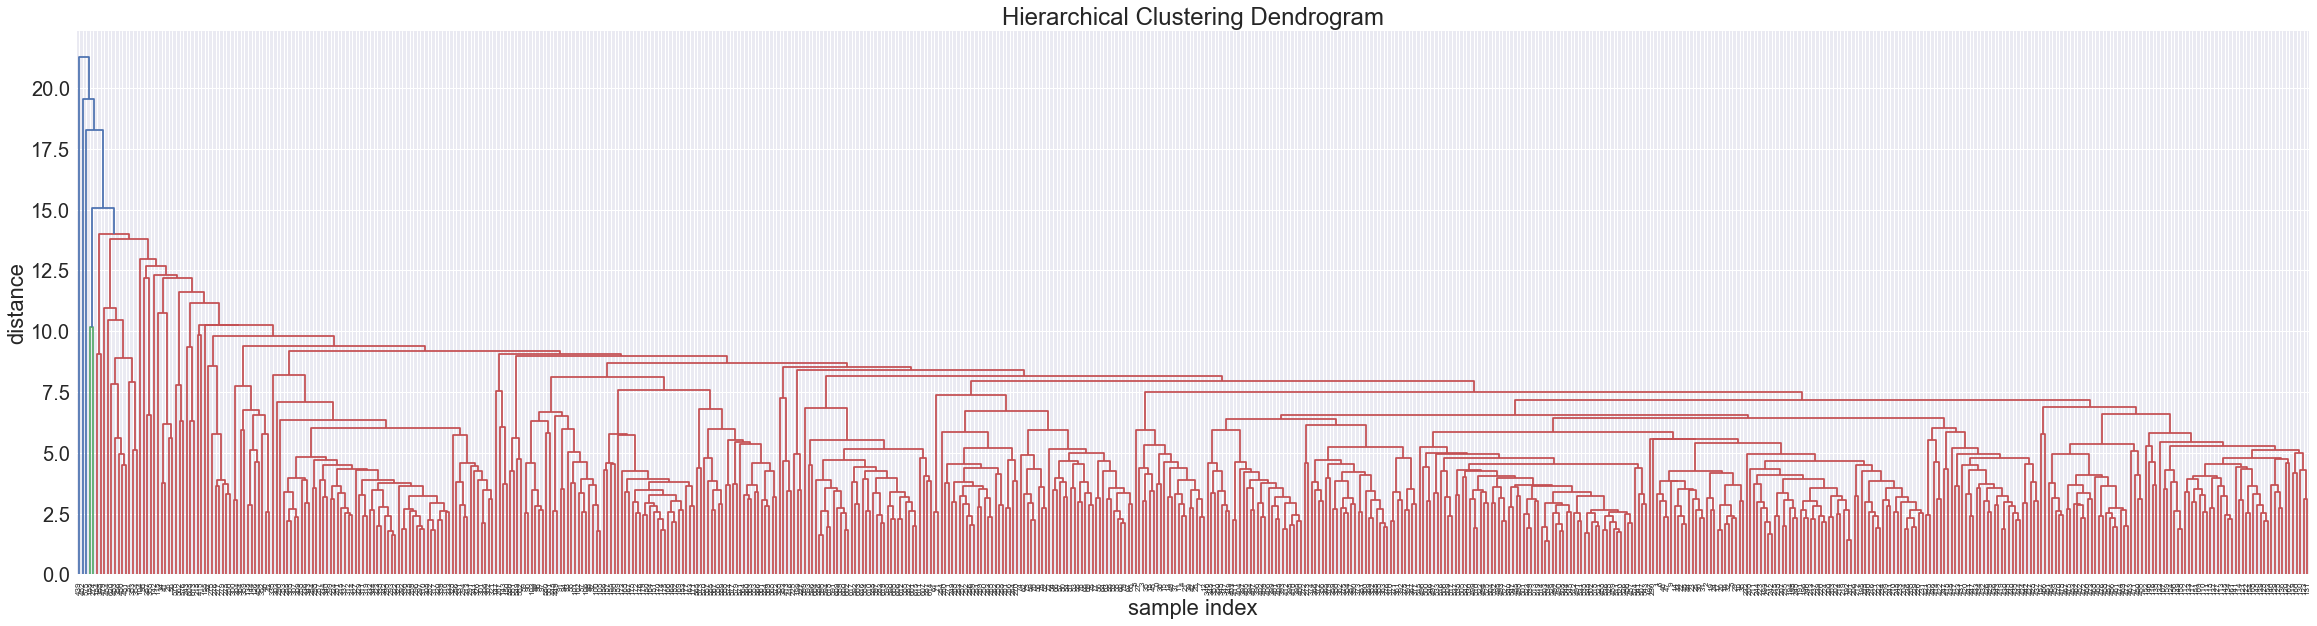

In [286]:
Z = linkage(X, 'average')
plt.figure(figsize=(40, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.show()

In [287]:
for distance in range(5,15):
    labels = fcluster(Z,distance,'distance')
    print (distance, max(Counter(labels).values()), max(labels))

5 60 117
6 141 70
7 232 48
8 383 36
9 501 27
10 585 20
11 588 14
12 594 12
13 604 7
14 616 5


In [288]:
labels = fcluster(Z,8,'distance')

In [289]:
print (Counter(labels))

Counter({30: 383, 21: 61, 26: 49, 29: 36, 25: 22, 20: 11, 18: 6, 5: 5, 11: 4, 23: 4, 27: 4, 24: 4, 6: 3, 28: 3, 13: 3, 9: 2, 14: 2, 19: 1, 10: 1, 33: 1, 12: 1, 32: 1, 31: 1, 3: 1, 1: 1, 16: 1, 15: 1, 2: 1, 22: 1, 4: 1, 17: 1, 36: 1, 8: 1, 35: 1, 7: 1, 34: 1})


In [290]:
groups_to_plot=[l for l in Counter(labels).keys() if Counter(labels)[l]>20]

In [291]:
df_sub_drop['group']=labels

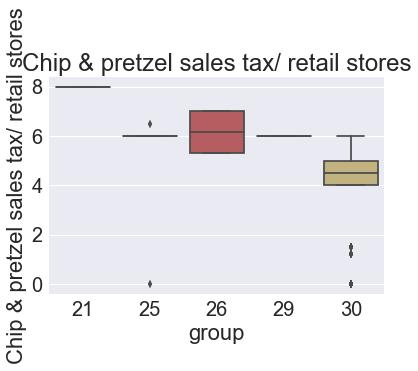

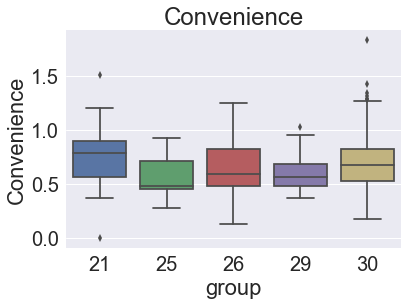

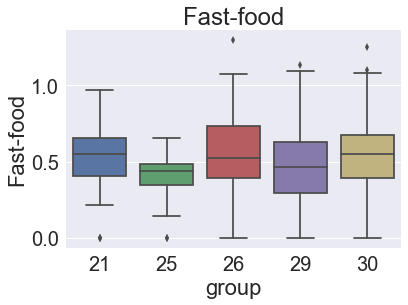

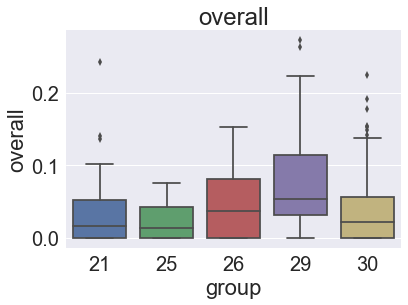

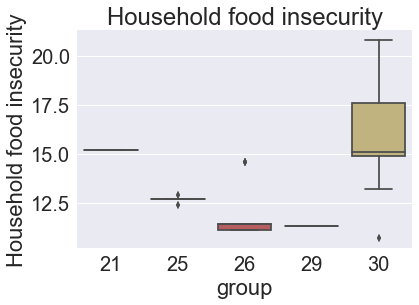

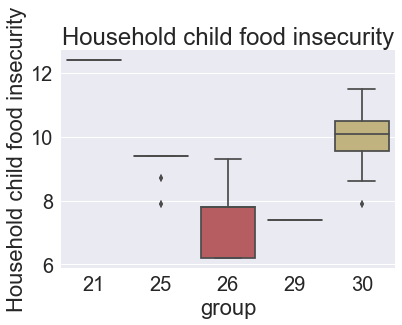

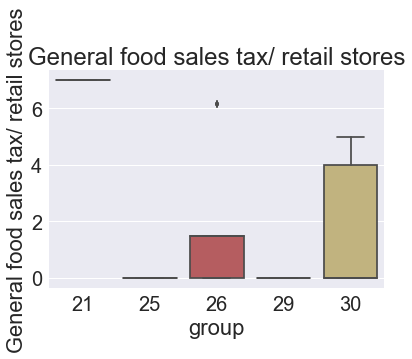

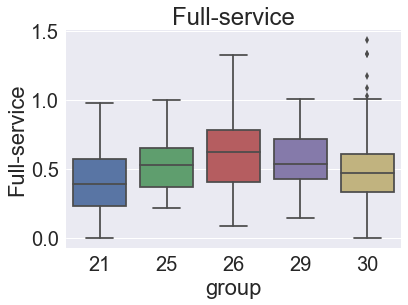

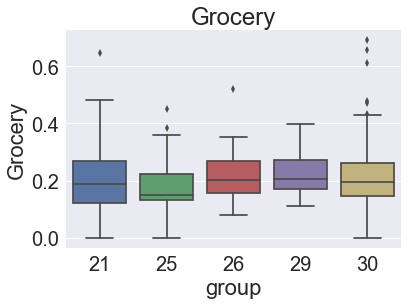

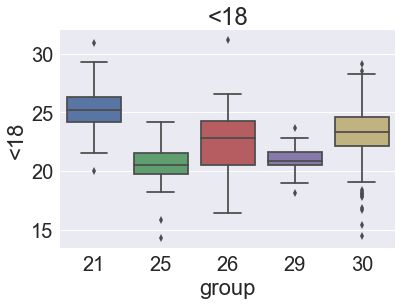

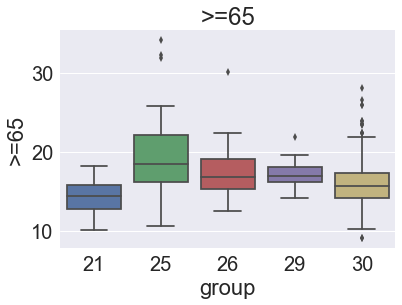

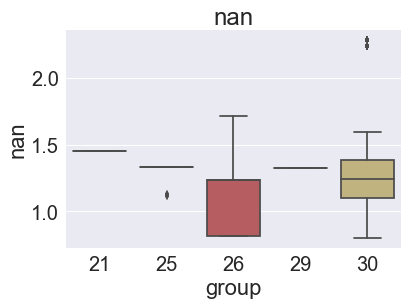

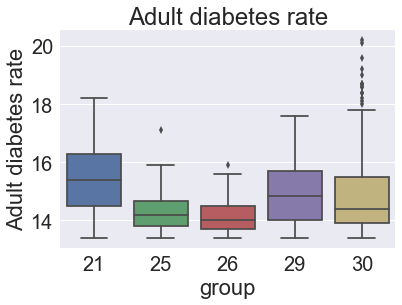

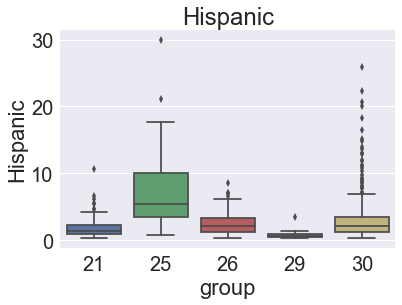

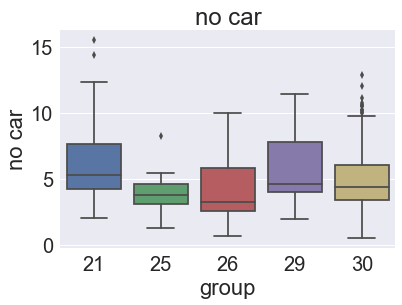

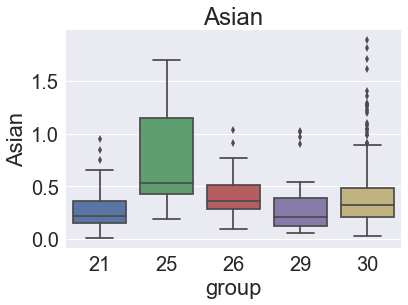

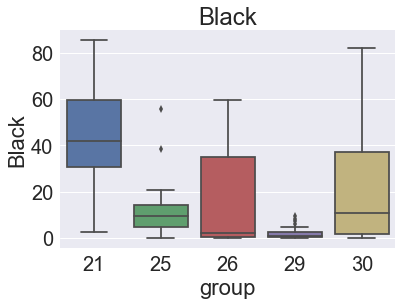

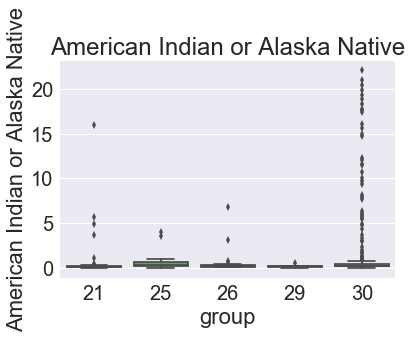

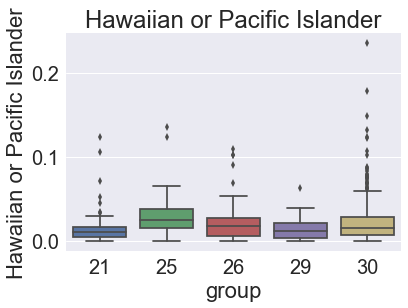

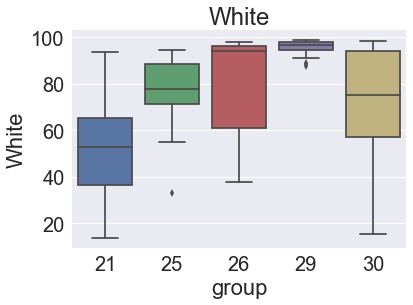

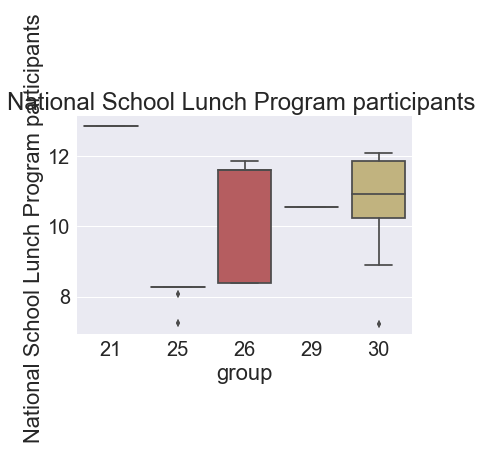

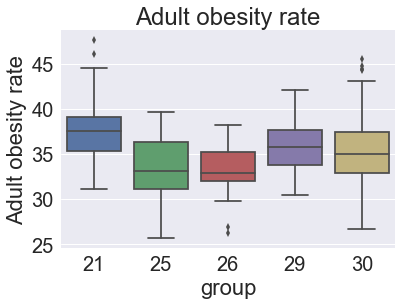

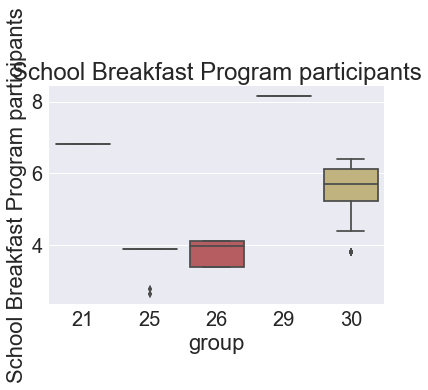

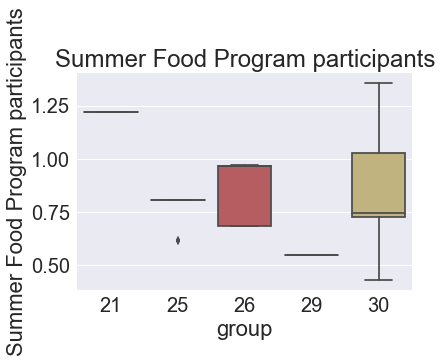

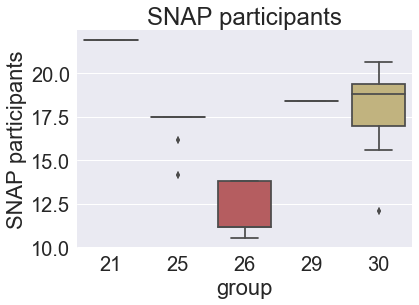

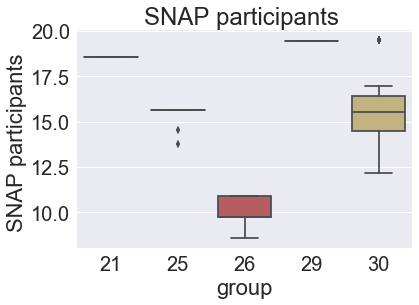

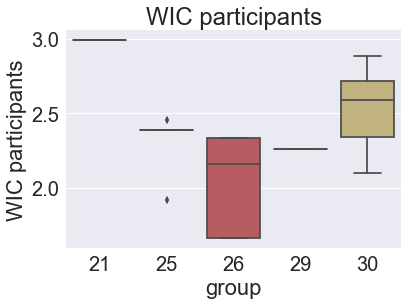

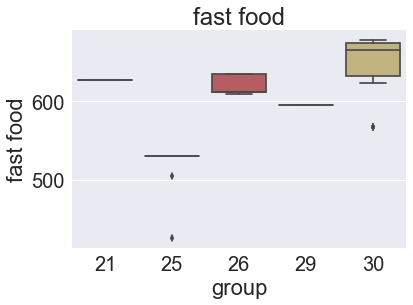

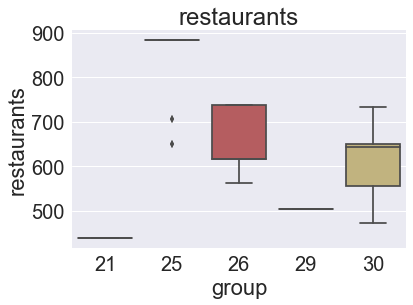

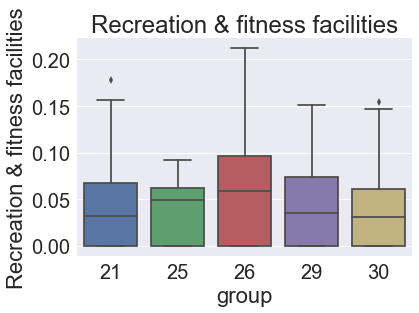

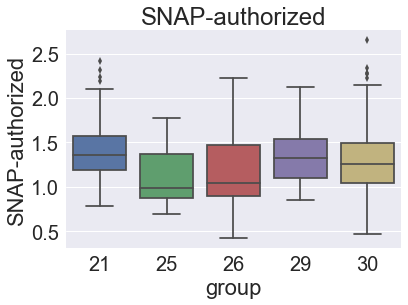

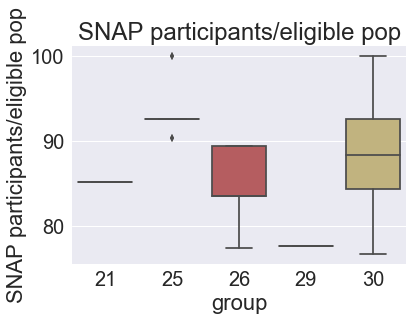

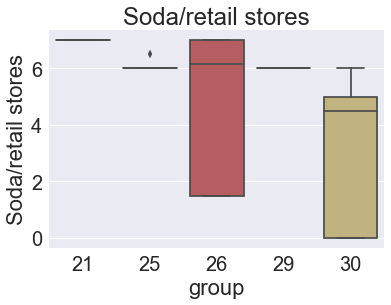

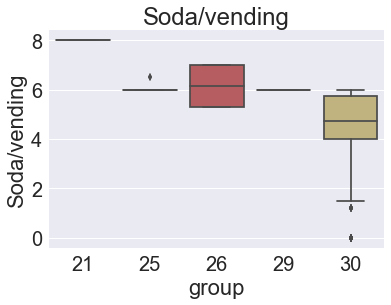

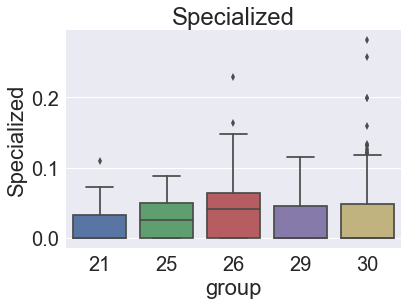

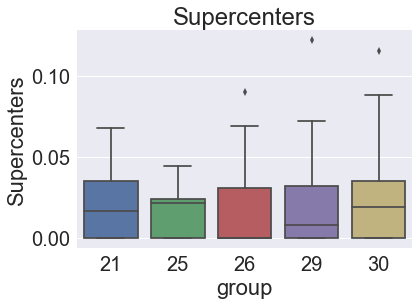

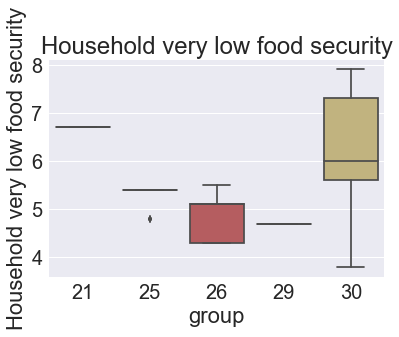

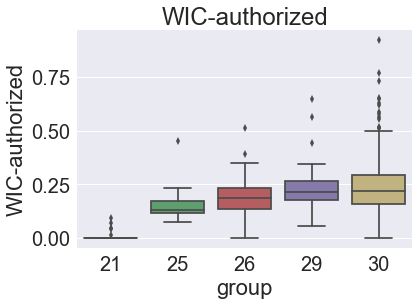

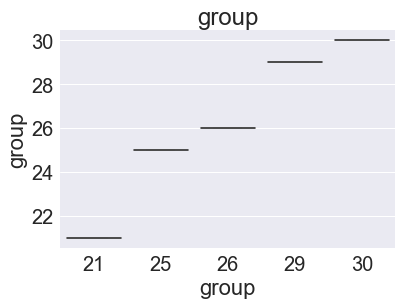

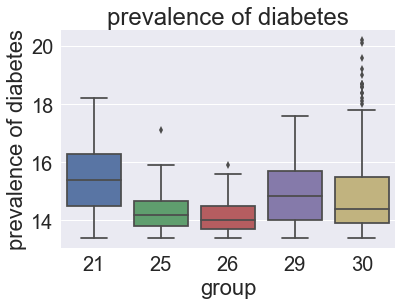

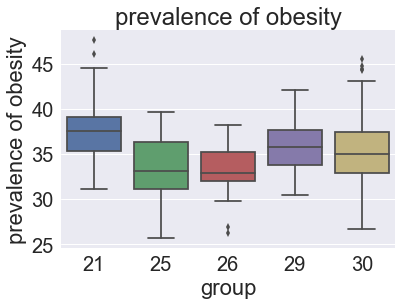

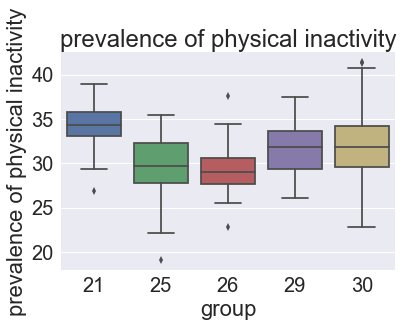

In [293]:
for c in df_sub_drop.columns:
    if is_numeric_dtype(df_sub_drop[c]):
        plt.figure()
        sns.boxplot(x='group', y=c, data=df_sub_drop[df_sub_drop['group'].isin(groups_to_plot)])
        if c in var_info_dict['Sub_subcategory Name'].keys():
            plt.title(var_info_dict['Sub_subcategory Name'][c])
            plt.ylabel(var_info_dict['Sub_subcategory Name'][c])
            
        else:
            plt.title(c) 
            plt.ylabel(c)
        
        plt.legend()
        plt.show()

Hierachical clustering of the most obesity prevalent counties

In [297]:
top_prev_ob=np.percentile(df['prevalence of obesity'].dropna(), 80)

In [302]:
df_sub_2=df[df['prevalence of obesity']>top_prev_ob]

In [303]:
df_sub_drop_2=df_sub_2[df_sub_2.columns.difference(['Region', 'Division','State', 'County', 'RUCC_2013', 'Adult_db', 'Adult_ob'])]

In [304]:
df_sub_drop_2=df_sub_drop_2.dropna(axis=1)

In [305]:
df_sub_drop_2.shape

(616, 42)

In [306]:
normed_data_sub_2=preprocessing.scale(df_sub_drop_2)
normed_df_sub_2=pd.DataFrame(normed_data_sub_2, index=df_sub_drop_2.index, columns=df_sub_drop_2.columns)

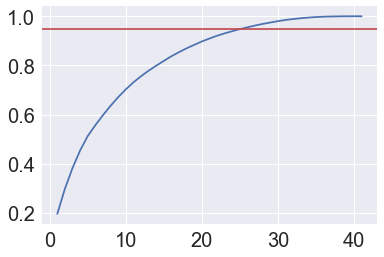

In [307]:
explained_var=list()
for d in range(1,len(normed_df_sub_2.columns)):
    pca = PCA(n_components=d)
    pca.fit(normed_df_sub_2)
    explained_var.append(sum(pca.explained_variance_ratio_))
    
plt.plot(range(1,len(normed_df_sub_2.columns)), explained_var)
plt.axhline(y=0.95, color='r')
plt.show()

In [308]:
#95% of variance can be explained by 25 components out of total 42 variables
pca = PCA(n_components=25)
pca.fit(normed_df_sub_2)
data_sub_2_transformed=pca.transform(normed_df_sub_2)
df_sub_2_transformed=pd.DataFrame(data_sub_2_transformed, index=normed_df_sub_2.index)

In [309]:
X=data_sub_2_transformed
distance_way= ['ward', 'single', 'average', 'weighted', 'centroid', 'median']

for m in distance_way:
    Z = linkage(X, m)
    c, coph_dists = cophenet(Z, pdist(X))
    print (m, c)

ward 0.455630658069
single 0.818551995648
average 0.851666418996
weighted 0.678099053787
centroid 0.843605234423
median 0.714807360049


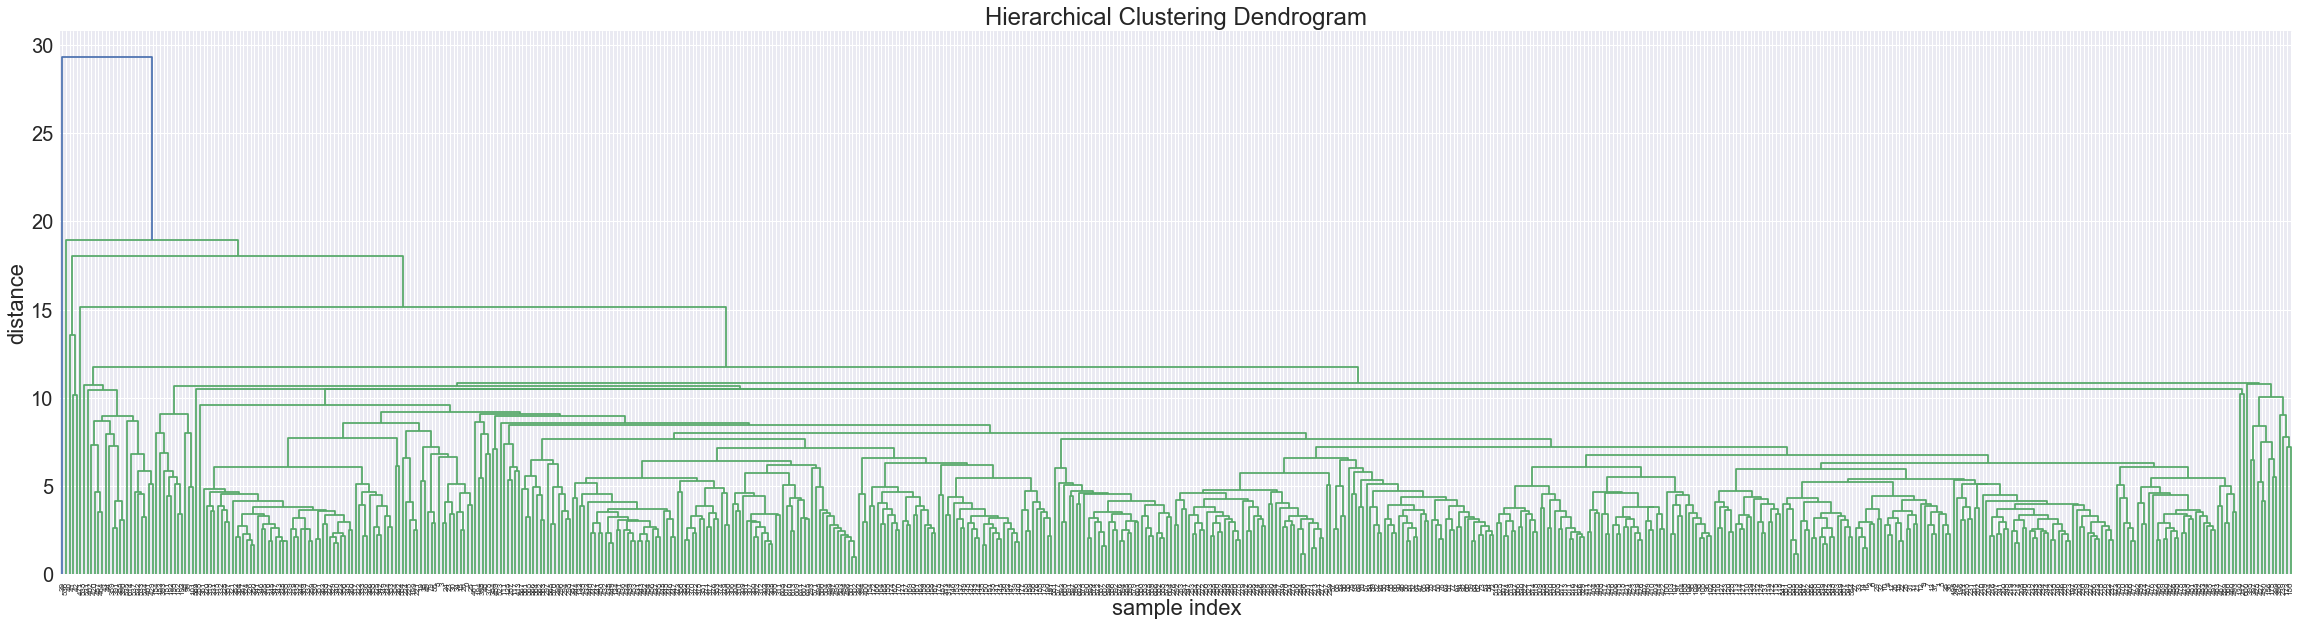

In [310]:
Z = linkage(X, 'average')
plt.figure(figsize=(40, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.show()

In [311]:
for distance in range(5,15):
    labels = fcluster(Z,distance,'distance')
    print (distance, max(Counter(labels).values()), max(labels))

5 42 114
6 111 77
7 205 50
8 327 34
9 482 22
10 563 17
11 590 7
12 610 6
13 610 6
14 610 5


In [312]:
labels = fcluster(Z,8,'distance')

In [313]:
print (Counter(labels))

Counter({21: 327, 20: 147, 13: 55, 15: 15, 10: 8, 6: 7, 5: 6, 28: 6, 19: 5, 14: 5, 16: 4, 4: 4, 29: 3, 11: 2, 18: 2, 27: 2, 34: 1, 3: 1, 1: 1, 2: 1, 12: 1, 24: 1, 25: 1, 23: 1, 30: 1, 17: 1, 32: 1, 22: 1, 8: 1, 7: 1, 33: 1, 9: 1, 26: 1, 31: 1})


In [314]:
groups_to_plot=[l for l in Counter(labels).keys() if Counter(labels)[l]>20]

In [315]:
df_sub_drop_2['group']=labels

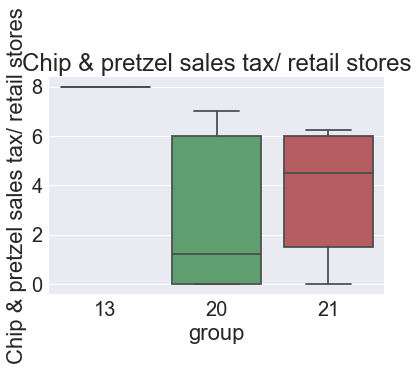

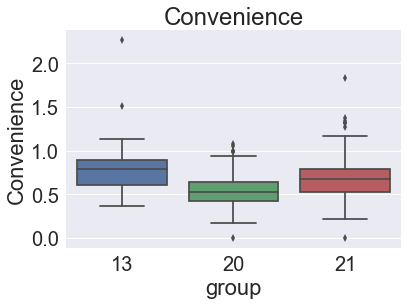

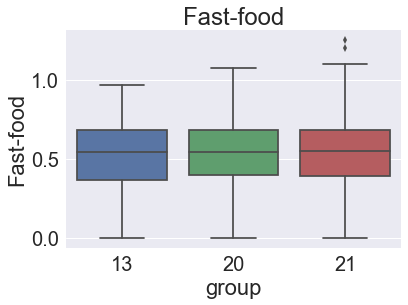

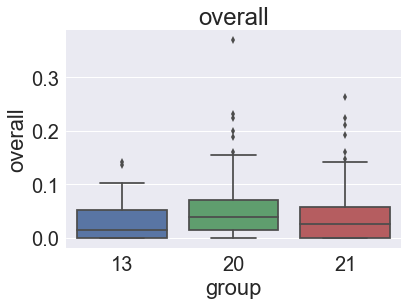

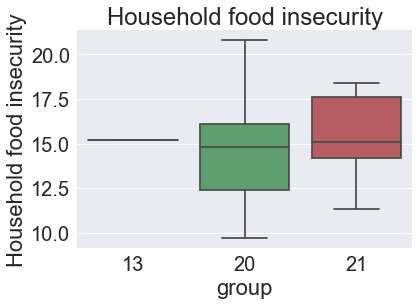

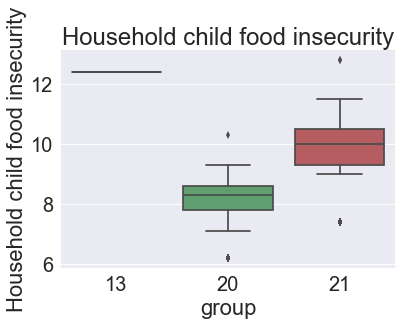

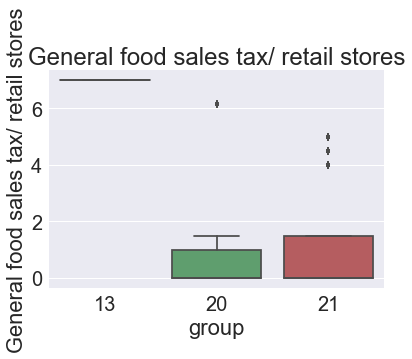

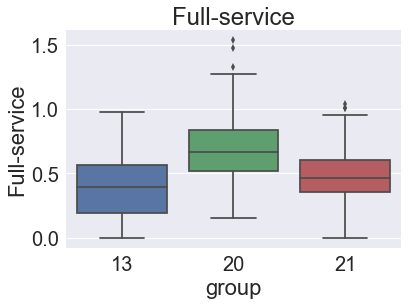

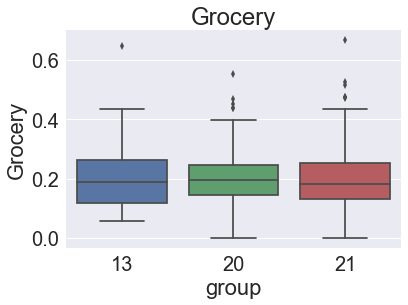

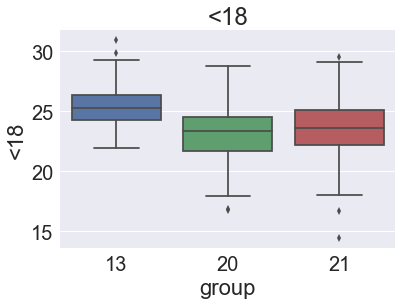

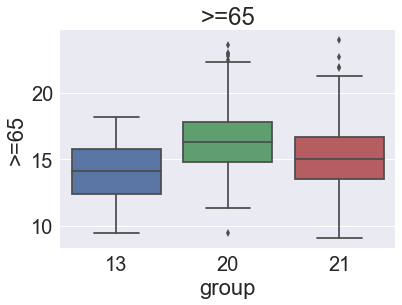

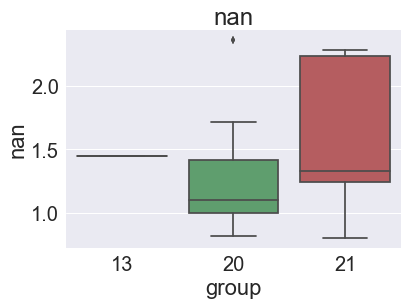

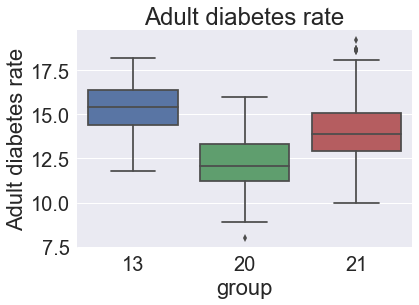

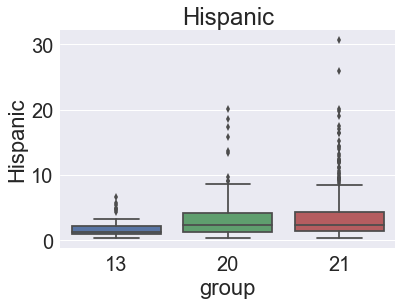

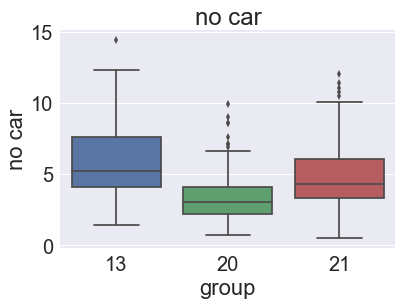

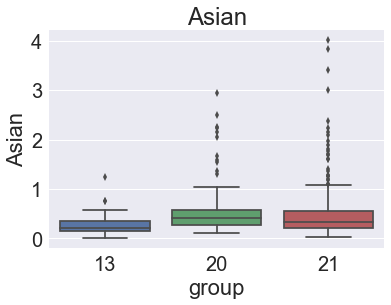

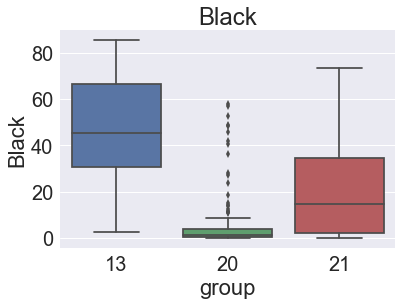

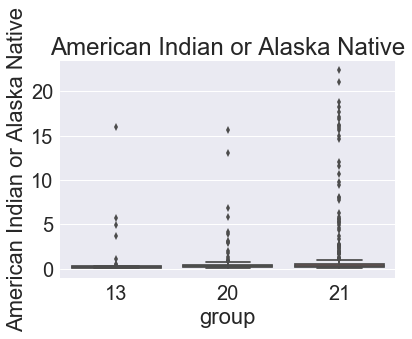

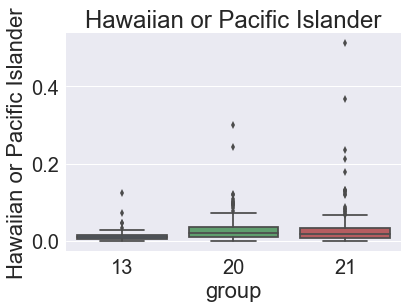

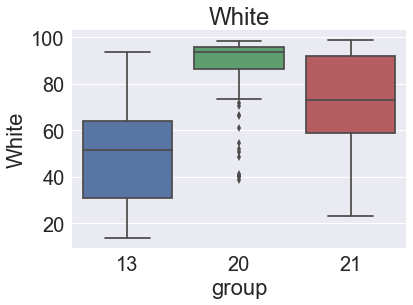

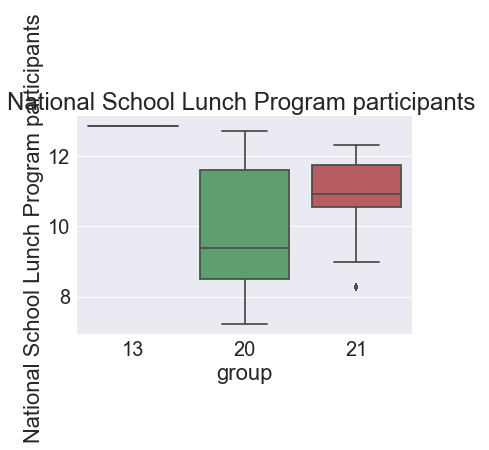

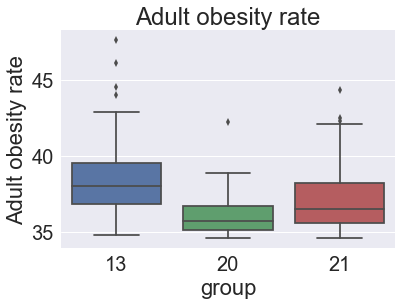

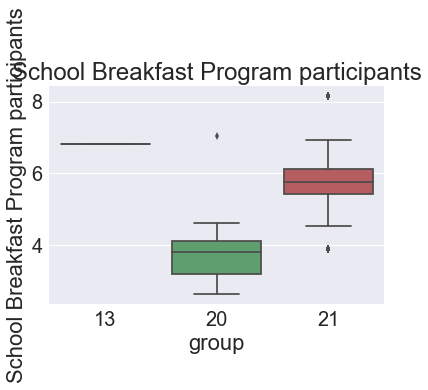

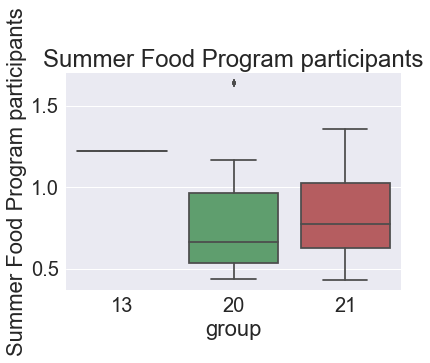

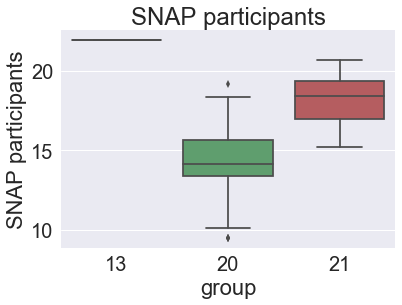

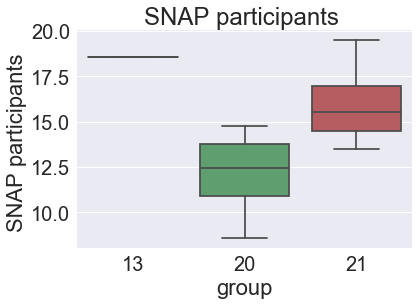

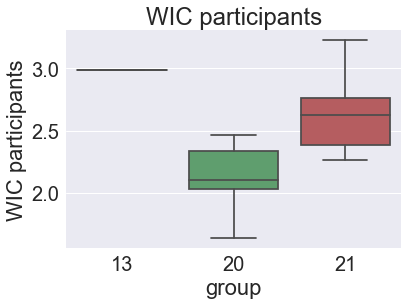

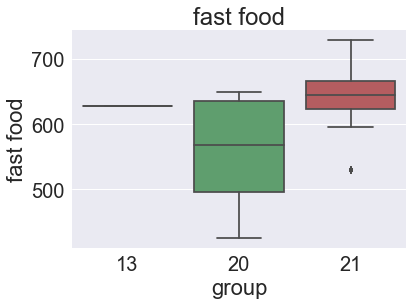

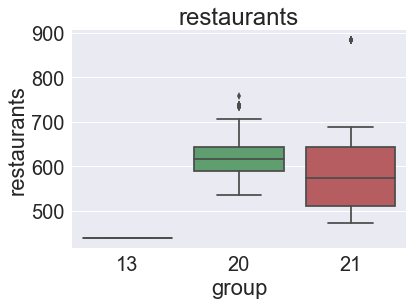

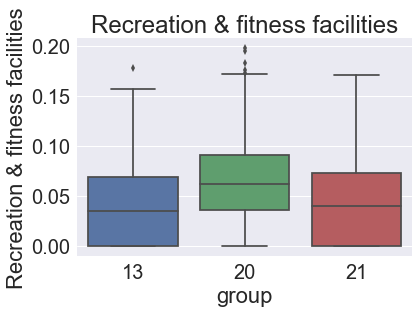

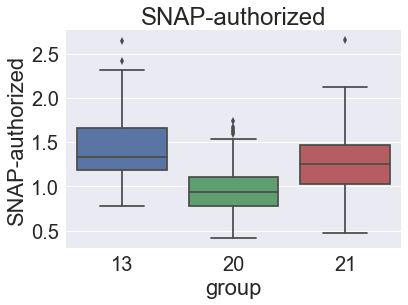

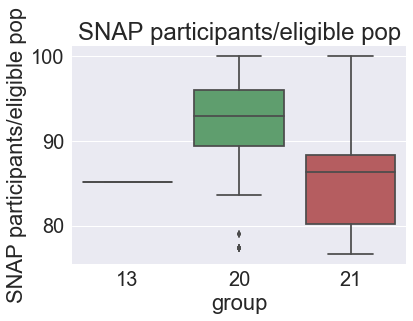

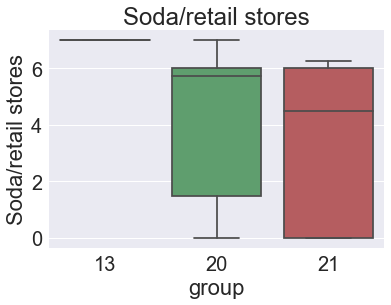

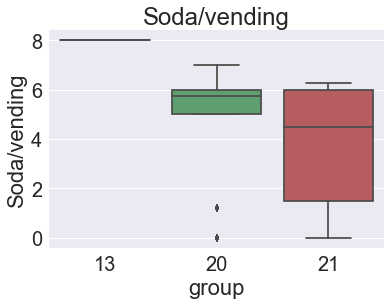

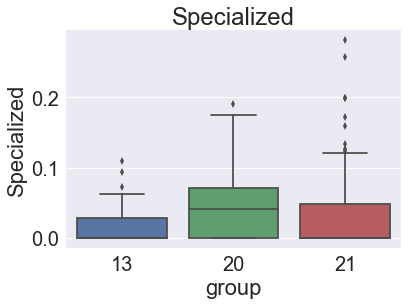

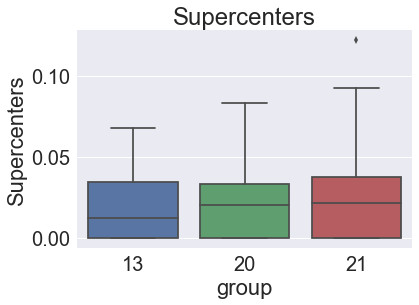

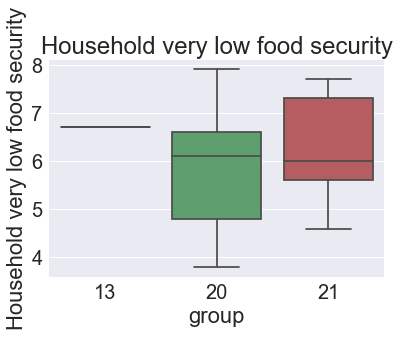

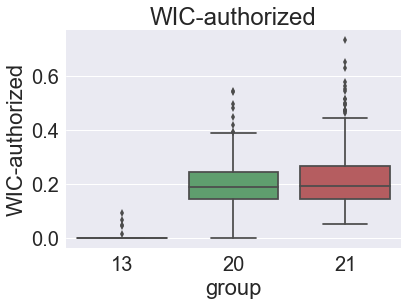

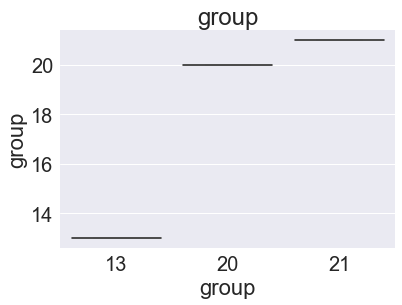

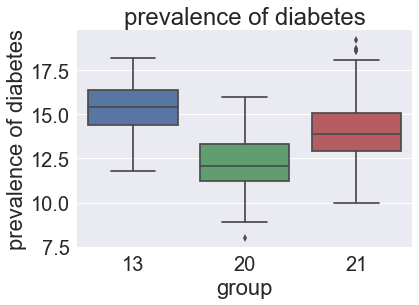

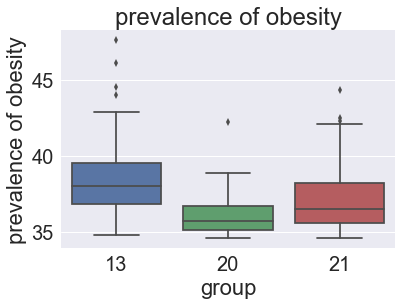

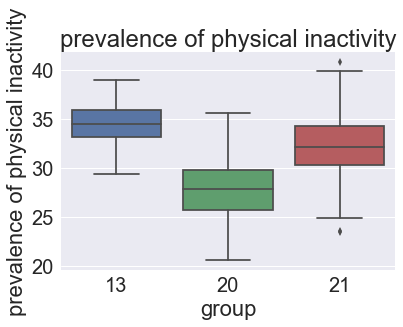

In [316]:
for c in df_sub_drop_2.columns:
    if is_numeric_dtype(df_sub_drop_2[c]):
        plt.figure()
        sns.boxplot(x='group', y=c, data=df_sub_drop_2[df_sub_drop_2['group'].isin(groups_to_plot)])
        if c in var_info_dict['Sub_subcategory Name'].keys():
            plt.title(var_info_dict['Sub_subcategory Name'][c])
            plt.ylabel(var_info_dict['Sub_subcategory Name'][c])
            
        else:
            plt.title(c) 
            plt.ylabel(c)
        
        plt.legend()
        plt.show()